# Counterfeit Medicine Sales Prediction

**By:** Hedgar Ajakaiye, 
**September 2019**

## Introduction

Counterfeit medicines are fake medicines which are either contaminated or contain wrong or no active ingredient. They could have the right active ingredient but at the wrong dose. Counterfeit drugs are illegal and are harmful to health. `10%` of the world's medicine is counterfeit and the problem is even worse in developing countries. Up to `30%` of medicines in developing countries are counterfeit.

Millions of pills, bottles and sachets of counterfeit and illegal medicines are being traded across the world. The World Health Organization (WHO) is working with International Criminal Police Organization (Interpol) to dislodge the criminal networks raking in billions of dollars from this cynical trade.

Despite all these efforts, counterfeit medicine selling rackets don’t seem to stop popping here and there. It has become a challenge to deploy resources to counter these; without spreading them too thin and eventually rendering them ineffective. Government has decided that they should focus on illegal operations of high networth first instead of trying to control all of them. In order to do that they have collected data which will help them to predict sales figures given an illegal operation's characteristics


## Formal Problem Statement

We would like to make example out a few of these counterfeiters but the challenge is what yardstick can we employ to determine the 'big fish(es)' that we can use as scape goat to send a strong message to these clandestine communities and equally serve as deterrent. After considering numerous features and attributes of these counterfeiters, we resolved to zero in on their sales figures. To this end we shall put to use the power of machine learning to scientifically predict current and future counterfeiters and stop them in their tracks for good!

We would train a model on  data we have collected secretly over the years on their operations. The data dictionary of the data is as follows:

                                                                                                                     | Variable                   |                  Description/ values                                  |             
 -----------------------------------------------------------------------------------------------------
| Medicine_ID                |Alphanumeric identification number;Norminal Integer                    |  
|Counterfeit_weight          |weighted percentage attached to each medicine;continuous               |     
|District_ID                 |District identification number; alphanumeric                           |     
|Active since                |year monitoring started;Integer                                        |     
|Medicine MRP                |Medicine price list;continuous                                         |       
|Medicine type               |the form of the medicine;categorical                                   |     
|Side effect level           |the severity of the side effect associated with the medicine,categoric |   
|Availability rating         |the rate at which the medicine is available,continuous                 |     
|Area type                   |the level of development of an area,                                   |     
|Area city type              |the rating of the city;categorical                                     |     
|Area district level         |the level of the area district;categorical                             |     
|Counterfeit sales           |value of sales,continuous                                              |   

                           





## Load Library, Packages, Modules

In [98]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import  mean_absolute_error
from sklearn.metrics import  r2_score
from sklearn.metrics import  mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline


In [99]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
#plt.rcParams.update({'font.size':25})

## Load Data

In [101]:
# change directory
# point to the directory that house the data
os.chdir("../data")

In [102]:
# read data into pandas
train_data = pd.read_csv('counterfeit_train.csv')
test_data = pd.read_csv('counterfeit_test.csv')

In [103]:
#shape of test and train data
train_data.shape, test_data.shape

((6818, 12), (1705, 11))

In [104]:
train_data.columns

Index(['Medicine_ID', 'Counterfeit_Weight', 'DistArea_ID', 'Active_Since',
       'Medicine_MRP', 'Medicine_Type', 'SidEffect_Level',
       'Availability_rating', 'Area_Type', 'Area_City_Type', 'Area_dist_level',
       'Counterfeit_Sales'],
      dtype='object')

In [105]:
# combine test and train data to ensure uniform preprocessing
# to combine test and train data successfully, the value of the columns of test and train data must equal
test_data['Counterfeit_Sales'] =np.nan
test_data['data'] = 'test'
train_data['data'] = 'train'
test_data = test_data[train_data.columns]
all_data = pd.concat([test_data, train_data], axis=0)



In [106]:
all_data.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,data
0,HLZ81,NaN,Area027,1983,85.5328,Antibiotics,mild,0.112747,CityLimits,Tier 3,Medium,NaN,test
1,ECE94,13.45,Area045,2000,257.1460,OralContraceptives,mild,0.144446,DownTown,Tier 2,Unknown,NaN,test
2,SAD14,7.10,Area045,2000,98.1172,Antipyretics,mild,0.144221,DownTown,Tier 2,Unknown,NaN,test
3,EQV63,18.30,Area010,1996,135.3730,Tranquilizers,mild,0.100388,MidTownResidential,Tier 3,Unknown,NaN,test
4,AIR10,NaN,Area019,1983,112.8016,OralContraceptives,mild,0.022585,MidTownResidential,Tier 1,Small,NaN,test


In [107]:
#check the dimension
all_data.shape

(8523, 13)

In [108]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 6817
Data columns (total 13 columns):
Medicine_ID            8523 non-null object
Counterfeit_Weight     7060 non-null float64
DistArea_ID            8523 non-null object
Active_Since           8523 non-null int64
Medicine_MRP           8523 non-null float64
Medicine_Type          8523 non-null object
SidEffect_Level        8523 non-null object
Availability_rating    8523 non-null float64
Area_Type              8523 non-null object
Area_City_Type         8523 non-null object
Area_dist_level        8523 non-null object
Counterfeit_Sales      6818 non-null float64
data                   8523 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 932.2+ KB


In [109]:
#make the column names uniform
def clean_colname(name):
    name = name.strip().lower()
    return name
all_data = all_data.rename(columns= clean_colname)
all_data.head()

,medicine_id,counterfeit_weight,distarea_id,active_since,medicine_mrp,medicine_type,sideffect_level,availability_rating,area_type,area_city_type,area_dist_level,counterfeit_sales,data
0,HLZ81,NaN,Area027,1983,85.5328,Antibiotics,mild,0.112747,CityLimits,Tier 3,Medium,NaN,test
1,ECE94,13.45,Area045,2000,257.1460,OralContraceptives,mild,0.144446,DownTown,Tier 2,Unknown,NaN,test
2,SAD14,7.10,Area045,2000,98.1172,Antipyretics,mild,0.144221,DownTown,Tier 2,Unknown,NaN,test
3,EQV63,18.30,Area010,1996,135.3730,Tranquilizers,mild,0.100388,MidTownResidential,Tier 3,Unknown,NaN,test
4,AIR10,NaN,Area019,1983,112.8016,OralContraceptives,mild,0.022585,MidTownResidential,Tier 1,Small,NaN,test


In [110]:
#check and treat missing value. This value should exlude the counterfeit sale column as the na there is intentional
all_data.isnull().mean() * 100

medicine_id             0.000000
counterfeit_weight     17.165317
distarea_id             0.000000
active_since            0.000000
medicine_mrp            0.000000
medicine_type           0.000000
sideffect_level         0.000000
availability_rating     0.000000
area_type               0.000000
area_city_type          0.000000
area_dist_level         0.000000
counterfeit_sales      20.004693
data                    0.000000
dtype: float64

In [111]:
# fill missing values in counterfeit_weight columns with the mean weight
# the counterfeit_weight column portion of the training data set and not the combined portion shall be used to calculate the mean
# all_data['counterfeit_weight'].mean() # 14.158
# all_data['counterfeit_weight'].fillna(14.158, inplace = True)
# print('current number of missing value ', all_data['counterfeit_weight'].isnull().sum())
filt = all_data['data'] == 'train'
all_data.loc[filt, 'counterfeit_weight'].mean() # 14.115
all_data['counterfeit_weight'].fillna(14.115, inplace= True)
print('Total number of missing values after treatment:', all_data['counterfeit_weight'].isnull().sum())




Total number of missing values after treatment: 0


In [112]:
# display descriptive stats
all_data.describe().T

,count,mean,std,min,25%,50%,75%,max
counterfeit_weight,8523.0,14.150325,4.226154,5.855,10.610000,14.115000,17.300000,22.650000
active_since,8523.0,1995.831867,8.371760,1983.000,1985.000000,1997.000000,2002.000000,2007.000000
medicine_mrp,8523.0,151.292782,62.275067,41.590,104.126500,153.312800,195.943700,277.188400
availability_rating,8523.0,0.079132,0.051598,0.013,0.039989,0.066931,0.107585,0.341391
counterfeit_sales,6818.0,2280.583480,1693.354404,146.290,933.265600,1902.670400,3207.638400,13199.964800


In [113]:
# columns with float type
cont_features = all_data.select_dtypes(include=['float64']).columns

In [114]:
#column with integer data type
integer_features = all_data.select_dtypes(include=['int64']).columns

In [115]:
#columns with categorical type. This does not include the 'data' which serves the purpose of a separator
all_data.select_dtypes(include=['object']).columns

Index(['medicine_id', 'distarea_id', 'medicine_type', 'sideffect_level',
       'area_type', 'area_city_type', 'area_dist_level', 'data'],
      dtype='object')

## Data Exploration

#### How many unique medicine type are present?

In [116]:
# Number of unique medicine type
train_data['Medicine_Type'].nunique()

16

#### which area type has the highest counterfeit drug?
Down Town, Area has the highest number of counterfeited drugs and medicine

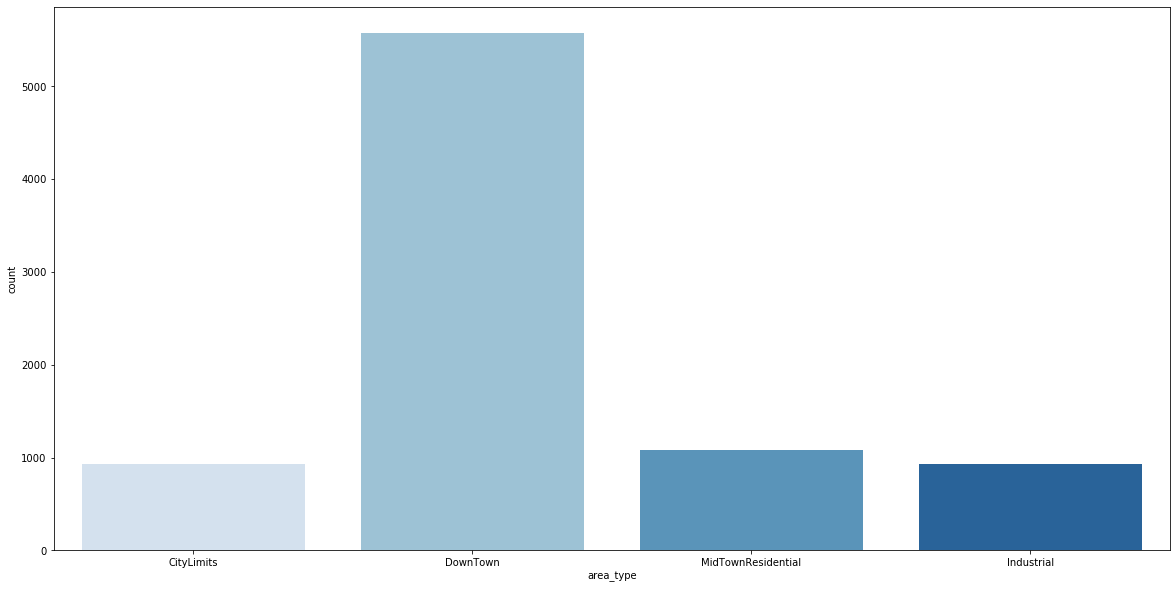

In [117]:
#which area type has the highest counterfeit drug

# train_data['Area_Type'].value_counts().plot(kind = 'bar')
# plt.xlabel('Area Type')
# plt.ylabel('count')
# plt.title('Counterfeit Drug Area Type Count');
sns.countplot(x ='area_type', data=all_data, palette='Blues');

### Which medicine type has the lowest count and their respective level of side effects?
Antiviral appears to be the least counterfeited medicine whereas Antibiotics are the third most counterfeited drug but with the most critical side effect level

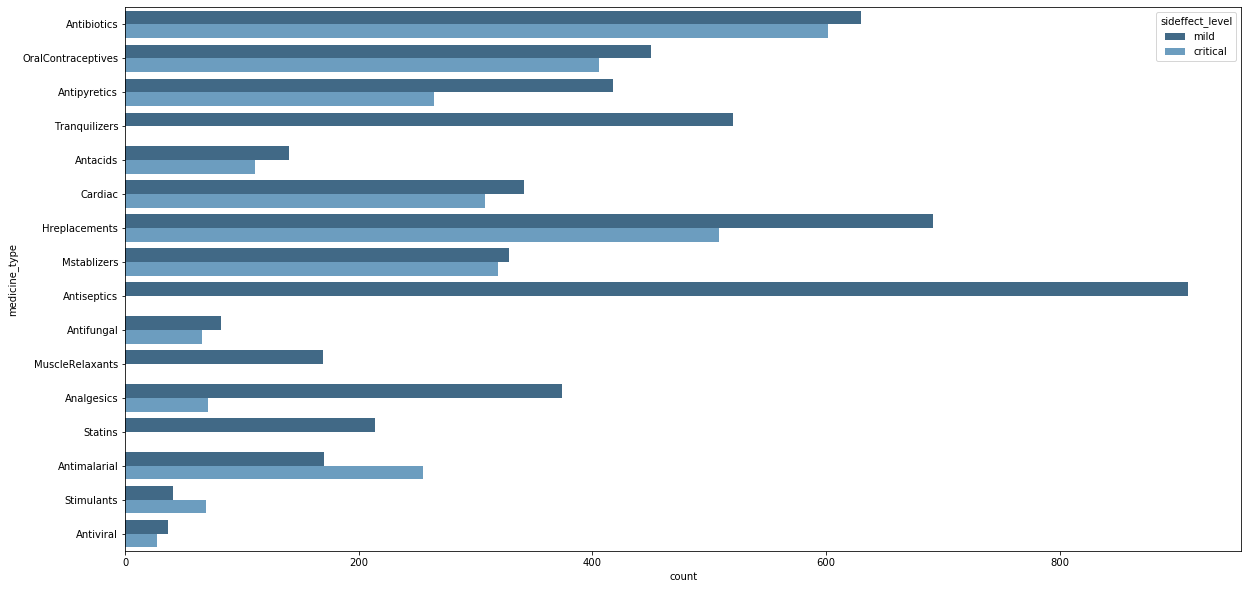

In [118]:
#which medicine type has the lowest count
#train_data['Medicine_Type'].value_counts(ascending=True)
sns.countplot(y='medicine_type', hue='sideffect_level', data=all_data, palette='Blues_d');

## How does the distribution of the counterfeit sale looks like
The distribution is not normal rather skewed to the right. This means that a handful of medicine have very high sales figures. This could also mean that there are alot of outliers in the counterfeit sale figure. lets check it out!

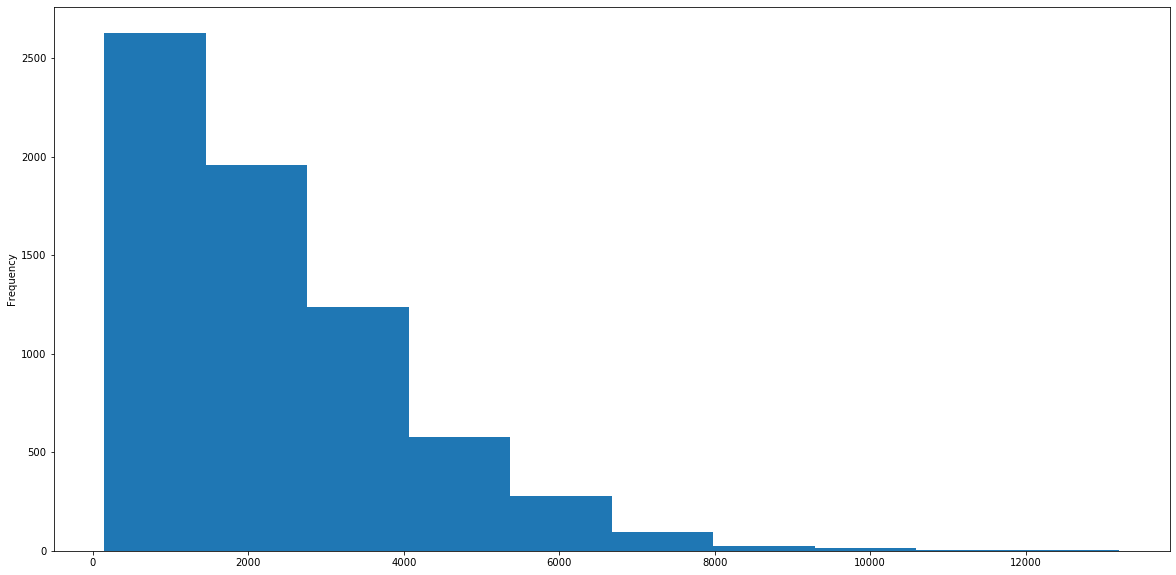

In [119]:
all_data['counterfeit_sales'].plot(kind = 'hist');

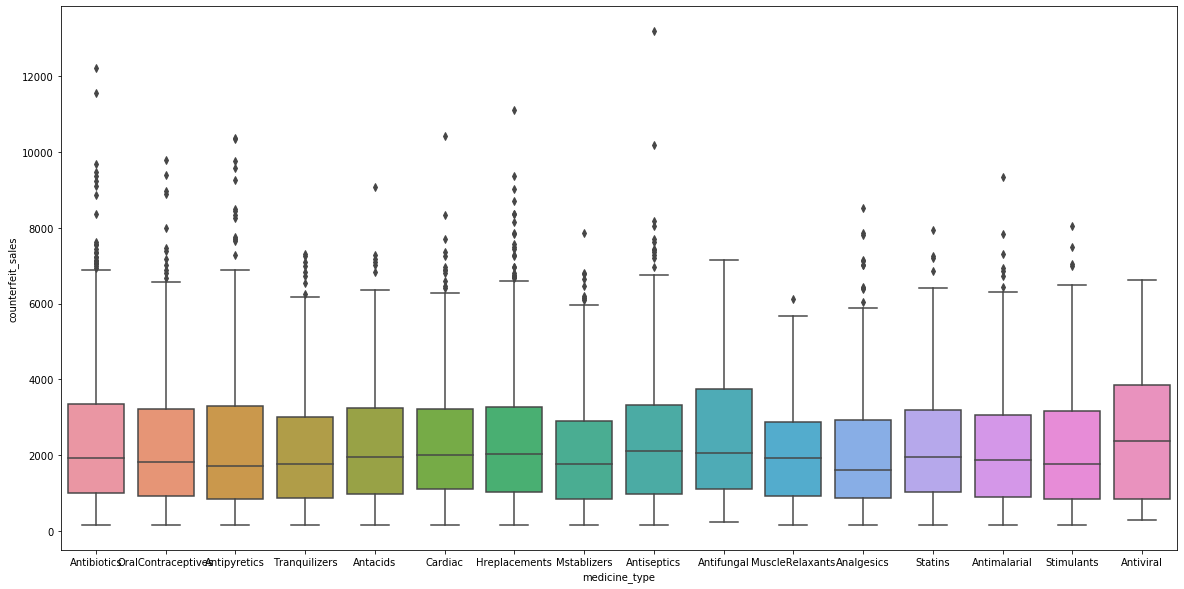

In [120]:
# checking the level of outlier of medicine type with respect to counterfeit sales
sns.boxplot(x = 'medicine_type', y = 'counterfeit_sales', data=all_data);

### What is the average sales figure of counterfeited medicine by medicine type
On average all the medicine type sale figure are above 2000 while **Antiviral** medicine type appears to command the highest average counterfeit sale. However this result should be taken with a pinch of salt until the outliers observed are treated appropriately!


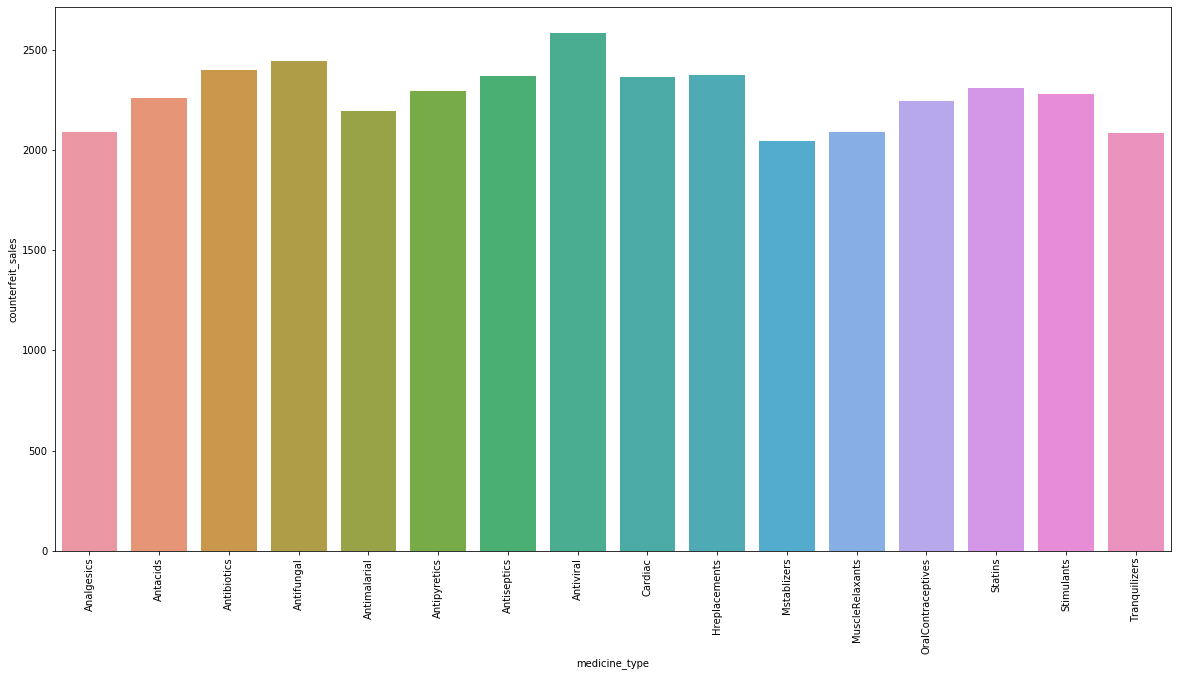

In [121]:
#average sales figure of counterfeited drugs 
filt = all_data['data'] == 'train'
adj_dat = all_data.loc[filt]
avg_sales = adj_dat.groupby('medicine_type').agg({'counterfeit_sales':'mean'}).reset_index()
sns.barplot(x = 'medicine_type', y='counterfeit_sales', data=avg_sales)
plt.xticks(rotation=90);


### Which medicine type has the highest counterfeit sales
While it appears that the **Antiviral** drug has the highest sales figure,this figure is suspect until the outliers observed are treated

In [122]:
filt = all_data['data'] == 'train'
highestsales = all_data.loc[filt]['counterfeit_sales']>= 13199.9648
print('The medicine with the highest sales figure is:',all_data.loc[filt]['medicine_type'][highestsales].values)

The medicine with the highest sales figure is: ['Antiseptics']


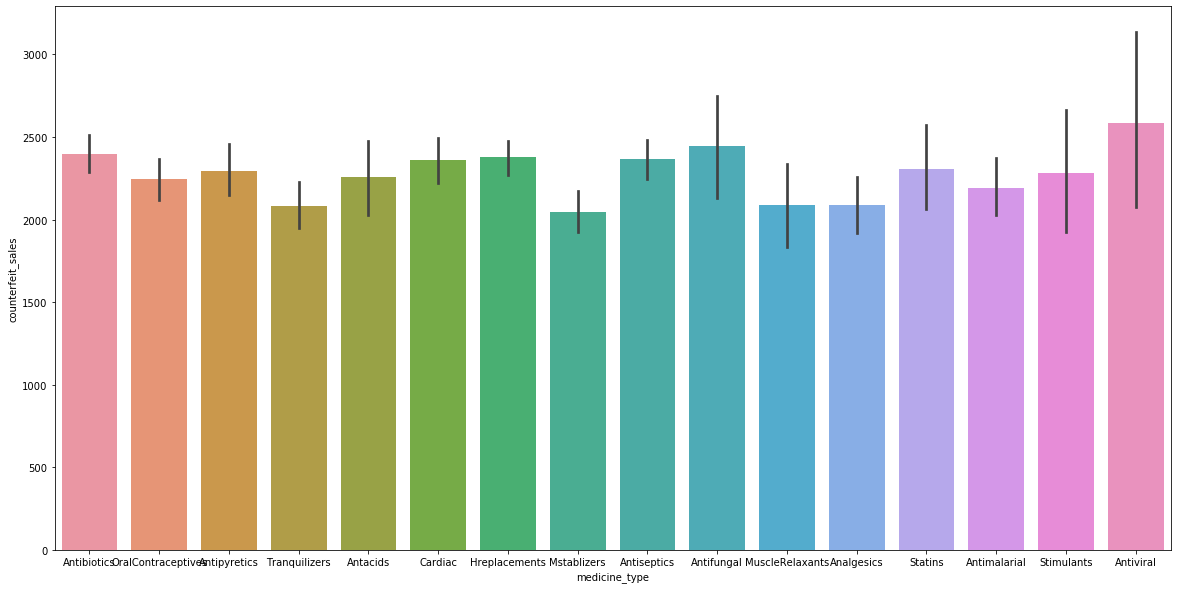

In [123]:
sns.barplot(x = 'medicine_type', y = 'counterfeit_sales', data=all_data);

In [124]:
all_data.columns

Index(['medicine_id', 'counterfeit_weight', 'distarea_id', 'active_since',
       'medicine_mrp', 'medicine_type', 'sideffect_level',
       'availability_rating', 'area_type', 'area_city_type', 'area_dist_level',
       'counterfeit_sales', 'data'],
      dtype='object')

### Data Preprocessing:Feature Engineering

In [125]:
# determine the period from the year since active till date
all_data['period_active'] =  2019 - all_data['active_since']

all_data = all_data.drop('active_since',1)
print('The number of columns after dropping the active_since column:',all_data.shape[1])


The number of columns after dropping the active_since column: 13


In [126]:
#check frequency of column
all_data['medicine_type'].value_counts()


Antibiotics           1232
Hreplacements         1200
Antiseptics            910
OralContraceptives     856
Antipyretics           682
Cardiac                649
Mstablizers            648
Tranquilizers          520
Analgesics             445
Antimalarial           425
Antacids               251
Statins                214
MuscleRelaxants        169
Antifungal             148
Stimulants             110
Antiviral               64
Name: medicine_type, dtype: int64

#### Treatment/transformation  of  categorical variable

In [127]:
# get dummy and drop Antiviral medicine for low frequency
medtypedummy = all_data['medicine_type'].str.get_dummies()


In [128]:
#add to the data frame accordingly
all_data = pd.concat([all_data, medtypedummy],1)
all_data = all_data.drop(['Antiviral','medicine_type'], 1)

In [129]:
all_data['area_type'].value_counts()

DownTown              5577
MidTownResidential    1083
CityLimits             935
Industrial             928
Name: area_type, dtype: int64

In [130]:
#create dummy of area_type
areatype_dummy = all_data['area_type'].str.get_dummies()


In [131]:
#drop industrial area type and add other area to data frame
all_data = pd.concat([all_data, areatype_dummy],1)
all_data = all_data.drop(['area_type', 'Industrial'],1)

In [132]:
pd.set_option('display.max_columns', 50)
all_data.head()

,medicine_id,counterfeit_weight,distarea_id,medicine_mrp,sideffect_level,availability_rating,area_city_type,area_dist_level,counterfeit_sales,data,period_active,Analgesics,Antacids,Antibiotics,Antifungal,Antimalarial,Antipyretics,Antiseptics,Cardiac,Hreplacements,Mstablizers,MuscleRelaxants,OralContraceptives,Statins,Stimulants,Tranquilizers,CityLimits,DownTown,MidTownResidential
0,HLZ81,14.115,Area027,85.5328,mild,0.112747,Tier 3,Medium,NaN,test,36,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,ECE94,13.450,Area045,257.1460,mild,0.144446,Tier 2,Unknown,NaN,test,19,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,SAD14,7.100,Area045,98.1172,mild,0.144221,Tier 2,Unknown,NaN,test,19,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,EQV63,18.300,Area010,135.3730,mild,0.100388,Tier 3,Unknown,NaN,test,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,AIR10,14.115,Area019,112.8016,mild,0.022585,Tier 1,Small,NaN,test,36,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [133]:
#create dummy for sideffect level columns of data frame
all_data['sideffect_level'].value_counts()

mild        5517
critical    3006
Name: sideffect_level, dtype: int64

In [134]:
#create dummy of sideffect column
all_data['sideffect_mc'] = np.where(all_data['sideffect_level'] == 'mild',1,0)
all_data = all_data.drop(['sideffect_level'], 1)

In [135]:
all_data['area_city_type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: area_city_type, dtype: int64

In [136]:
#create dummy for area city type
actype_dummy = all_data['area_city_type'].str.get_dummies()


In [137]:
#concat dummy with data frame and drop Tier one
all_data = pd.concat([all_data, actype_dummy],1)
all_data = all_data.drop(['Tier 1','area_city_type'], 1)

In [138]:
all_data['distarea_id'].value_counts()

Area027    935
Area013    932
Area035    930
Area046    930
Area049    930
Area045    929
Area018    928
Area017    926
Area010    555
Area019    528
Name: distarea_id, dtype: int64

In [139]:
# create dumy for district area id drop area019 and concatenate with data frame accordingly
distarea_dummy =  all_data['distarea_id'].str.get_dummies()


In [140]:
all_data = pd.concat([all_data, distarea_dummy],1)
all_data = all_data.drop(['Area019', 'distarea_id'],1)

In [141]:
all_data['area_dist_level'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: area_dist_level, dtype: int64

In [142]:
#create dummy of area distance level
ad_leve_dummy = all_data['area_dist_level'].str.get_dummies()


In [143]:


#concatenate dummy with data frame and drop high area distance
all_data = pd.concat([all_data, ad_leve_dummy],1)
all_data = all_data.drop(['High', 'area_dist_level'],1)

In [144]:

#dimemsion of combined data
all_data.shape

(8523, 40)

### Separate data into train and  test

In [145]:
#separate train data set from data frame and delete useless columns
counter_train = all_data[all_data['data'] == 'train']
del counter_train['data']


In [146]:
#separate test data from data frame and delete/drop useless columns
counter_test = all_data[all_data['data'] == 'test']
counter_test.drop(['data', 'counterfeit_sales'],axis = 1, inplace = True )



/Users/ajakaiye/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [147]:
#dimension of test and train data set
print('Our training data set has {} rows and {} columns'.format(counter_train.shape[0],counter_train.shape[1]))
print('Our testing data set has {} rows and {} columns'.format(counter_test.shape[0],counter_test.shape[1]))



Our training data set has 6818 rows and 39 columns
Our testing data set has 1705 rows and 38 columns


In [148]:
#check for missing values in test and train
print('Are there missing values in test data set:', counter_test.isnull().any().any())
print('Are there missing values in train data set:',counter_train.isnull().any().any())

Are there missing values in test data set: False
Are there missing values in train data set: False


### Feature Scaling and P.C.A
In order to train our data on many algorithm as possible and subsequently evaluate performance  we would create three copies of our training and test data set as follows:
* Training/testing data set that is scaled only
* Training/testing data set that is scaled and P.C.A applied with a cumulative explained ratio of at least 80%
* Training/testing data set free from the above operations

##### scaled Training and Test data set 

In [149]:
# before we proceed we would want to drop the medicine id from both data set as it does not have a predictive value
#we would also remove the target variable from the train set
sales_figures = counter_train[['counterfeit_sales']]
train_counter_w_o_spca = counter_train.drop(['medicine_id','counterfeit_sales'],axis =1)
test_counter_w_o_spca = counter_test.drop(['medicine_id'],axis =1)

In [150]:
train_counter_w_o_spca.head(2)

,counterfeit_weight,medicine_mrp,availability_rating,period_active,Analgesics,Antacids,Antibiotics,Antifungal,Antimalarial,Antipyretics,Antiseptics,Cardiac,Hreplacements,Mstablizers,MuscleRelaxants,OralContraceptives,Statins,Stimulants,Tranquilizers,CityLimits,DownTown,MidTownResidential,sideffect_mc,Tier 2,Tier 3,Area010,Area013,Area017,Area018,Area027,Area035,Area045,Area046,Area049,Medium,Small,Unknown
0,13.100,160.2366,0.070422,24,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,14.115,110.4384,0.013000,36,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0


In [151]:
test_counter_w_o_spca.head(2)

,counterfeit_weight,medicine_mrp,availability_rating,period_active,Analgesics,Antacids,Antibiotics,Antifungal,Antimalarial,Antipyretics,Antiseptics,Cardiac,Hreplacements,Mstablizers,MuscleRelaxants,OralContraceptives,Statins,Stimulants,Tranquilizers,CityLimits,DownTown,MidTownResidential,sideffect_mc,Tier 2,Tier 3,Area010,Area013,Area017,Area018,Area027,Area035,Area045,Area046,Area049,Medium,Small,Unknown
0,14.115,85.5328,0.112747,36,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,13.450,257.1460,0.144446,19,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [152]:
sales_figures.head(2)

,counterfeit_sales
0,1775.5026
1,3069.1520


In [153]:
train_counter_w_o_spca.shape, test_counter_w_o_spca.shape

((6818, 37), (1705, 37))

In [154]:
#scaled train and test data frame
scaled_counter_train = pd.DataFrame(StandardScaler().fit_transform(train_counter_w_o_spca), columns=train_counter_w_o_spca.columns)
scaled_counter_test = pd.DataFrame(StandardScaler().fit_transform(test_counter_w_o_spca),columns=test_counter_w_o_spca.columns)

In [155]:
#lets have a peak of our scled data frame
scaled_counter_train.head()

,counterfeit_weight,medicine_mrp,availability_rating,period_active,Analgesics,Antacids,Antibiotics,Antifungal,Antimalarial,Antipyretics,Antiseptics,Cardiac,Hreplacements,Mstablizers,MuscleRelaxants,OralContraceptives,Statins,Stimulants,Tranquilizers,CityLimits,DownTown,MidTownResidential,sideffect_mc,Tier 2,Tier 3,Area010,Area013,Area017,Area018,Area027,Area035,Area045,Area046,Area049,Medium,Small,Unknown
0,-0.239789,0.142044,-0.170030,0.099938,-0.234715,-0.176509,-0.40727,-0.128646,4.371738,-0.292101,-0.344682,-0.287941,-0.408737,-0.285544,-0.144262,-0.336637,-0.158458,-0.118872,-0.256214,-0.347604,0.722174,-0.383205,-1.363781,-0.700428,-0.798600,-0.263292,-0.351303,-0.354195,-0.346012,-0.347604,-0.35104,-0.347869,2.846542,-0.348663,-0.690910,1.592579,-0.630183
1,-0.000011,-0.658577,-1.285498,1.533910,-0.234715,-0.176509,-0.40727,-0.128646,-0.228742,-0.292101,-0.344682,-0.287941,-0.408737,3.502084,-0.144262,-0.336637,-0.158458,-0.118872,-0.256214,2.876837,-1.384708,-0.383205,0.733255,-0.700428,1.252192,-0.263292,-0.351303,-0.354195,-0.346012,2.876837,-0.35104,-0.347869,-0.351303,-0.348663,1.447367,-0.627912,-0.630183
2,-1.202446,1.736475,-0.357270,0.099938,-0.234715,-0.176509,-0.40727,-0.128646,-0.228742,-0.292101,-0.344682,3.472939,-0.408737,-0.285544,-0.144262,-0.336637,-0.158458,-0.118872,-0.256214,-0.347604,0.722174,-0.383205,0.733255,-0.700428,-0.798600,-0.263292,-0.351303,-0.354195,-0.346012,-0.347604,-0.35104,-0.347869,2.846542,-0.348663,-0.690910,1.592579,-0.630183
3,-0.546895,-0.826672,-0.264562,0.099938,-0.234715,-0.176509,-0.40727,-0.128646,-0.228742,-0.292101,-0.344682,-0.287941,-0.408737,-0.285544,-0.144262,2.970557,-0.158458,-0.118872,-0.256214,-0.347604,0.722174,-0.383205,0.733255,-0.700428,-0.798600,-0.263292,-0.351303,-0.354195,-0.346012,-0.347604,-0.35104,-0.347869,2.846542,-0.348663,-0.690910,1.592579,-0.630183
4,-0.000011,-1.526724,3.296290,1.533910,-0.234715,-0.176509,-0.40727,-0.128646,-0.228742,-0.292101,-0.344682,-0.287941,2.446560,-0.285544,-0.144262,-0.336637,-0.158458,-0.118872,-0.256214,-0.347604,-1.384708,2.609569,-1.363781,-0.700428,-0.798600,-0.263292,-0.351303,-0.354195,-0.346012,-0.347604,-0.35104,-0.347869,-0.351303,-0.348663,-0.690910,1.592579,-0.630183


In [156]:
# the evidence of a scaled data set is that the mean must 0 and the stardard diviation must be 1
scaled_counter_train.describe().T

,count,mean,std,min,25%,50%,75%,max
counterfeit_weight,6818.0,-5.481747e-16,1.000073,-1.951311,-0.830377,-0.000011,0.752397,2.016253
medicine_mrp,6818.0,-8.233041e-17,1.000073,-1.762260,-0.753900,0.028846,0.719409,2.022317
availability_rating,6818.0,-3.074364e-16,1.000073,-1.285498,-0.759864,-0.237364,0.554070,5.093801
period_active,6818.0,-1.802932e-16,1.000073,-1.334034,-0.736546,-0.139058,1.294914,1.533910
Analgesics,6818.0,-3.855981e-17,1.000073,-0.234715,-0.234715,-0.234715,-0.234715,4.260479
Antacids,6818.0,-6.252943e-18,1.000073,-0.176509,-0.176509,-0.176509,-0.176509,5.665429
Antibiotics,6818.0,1.432966e-17,1.000073,-0.407270,-0.407270,-0.407270,-0.407270,2.455375
Antifungal,6818.0,-1.198481e-17,1.000073,-0.128646,-0.128646,-0.128646,-0.128646,7.773251
Antimalarial,6818.0,-4.872085e-17,1.000073,-0.228742,-0.228742,-0.228742,-0.228742,4.371738
Antipyretics,6818.0,-1.875883e-17,1.000073,-0.292101,-0.292101,-0.292101,-0.292101,3.423470


In [157]:
#pca and sclaed version of test and train set; Apply Principal Component Analysis, 
#a fancy name for reducing the number colums without loosing data. PCA uses scaled data only
pca = PCA(n_components=37)
pca_scaled_counter_test = pd.DataFrame(pca.fit_transform(scaled_counter_test), columns=scaled_counter_test.columns)
pca_scaled_counter_train = pd.DataFrame(pca.fit_transform(scaled_counter_train), columns=scaled_counter_train.columns)


In [158]:
#Let see the critical attributes of PCA: Explained Variance & Explained variance ratio
#expalined variance
pca.explained_variance_

array([4.62909965e+00, 2.69468786e+00, 2.50273279e+00, 2.04629901e+00,
       1.80330027e+00, 1.51225709e+00, 1.48483326e+00, 1.24130483e+00,
       1.19569542e+00, 1.16503110e+00, 1.14137367e+00, 1.11996342e+00,
       1.10427248e+00, 1.09911883e+00, 1.08591208e+00, 1.07923465e+00,
       1.06363119e+00, 1.04784011e+00, 1.03302307e+00, 1.02432398e+00,
       1.01882760e+00, 1.01612949e+00, 9.30410749e-01, 9.03332894e-01,
       8.60839639e-01, 6.05840014e-01, 5.88203011e-01, 7.90944370e-03,
       2.65613080e-30, 2.10488861e-30, 1.34364467e-30, 9.36321841e-31,
       6.82952828e-31, 4.97952544e-31, 1.95285746e-31, 7.60763518e-32,
       1.61270079e-32])

In [159]:
#explaned variance ratio
pca.explained_variance_ratio_

array([1.25092451e-01, 7.28187196e-02, 6.76315058e-02, 5.52972670e-02,
       4.87306966e-02, 4.08658186e-02, 4.01247428e-02, 3.35438586e-02,
       3.23113527e-02, 3.14827087e-02, 3.08434126e-02, 3.02648419e-02,
       2.98408249e-02, 2.97015573e-02, 2.93446706e-02, 2.91642259e-02,
       2.87425727e-02, 2.83158493e-02, 2.79154474e-02, 2.76803714e-02,
       2.75318424e-02, 2.74589312e-02, 2.51425483e-02, 2.44108217e-02,
       2.32625238e-02, 1.63716528e-02, 1.58950470e-02, 2.13737395e-04,
       7.17767897e-32, 5.68805374e-32, 3.63093944e-32, 2.53022840e-32,
       1.84554773e-32, 1.34562029e-32, 5.27721902e-33, 2.05581605e-33,
       4.35801149e-34])

#### P.C.A  Variance Report

In [160]:
#To make sense of of this bunch of numbers we would create a data frame that depict the cummulated explained variance ratio
data = {'Variance': pca.explained_variance_, '%Variance_ratio':pca.explained_variance_ratio_*100}
var_report = pd.DataFrame(data)
var_report['CumSum'] = var_report['%Variance_ratio'].cumsum()
print('Number of obervation n = {}'.format(pca.n_samples_))
var_report

Number of obervation n = 6818


,Variance,%Variance_ratio,CumSum
0,4.629100e+00,1.250925e+01,12.509245
1,2.694688e+00,7.281872e+00,19.791117
2,2.502733e+00,6.763151e+00,26.554268
3,2.046299e+00,5.529727e+00,32.083994
4,1.803300e+00,4.873070e+00,36.957064
5,1.512257e+00,4.086582e+00,41.043646
6,1.484833e+00,4.012474e+00,45.056120
7,1.241305e+00,3.354386e+00,48.410506
8,1.195695e+00,3.231135e+00,51.641641
9,1.165031e+00,3.148271e+00,54.789912


#### decision time:how many component should we settle for?
from the scree diagram, we may settle for 26 components with 99% of  


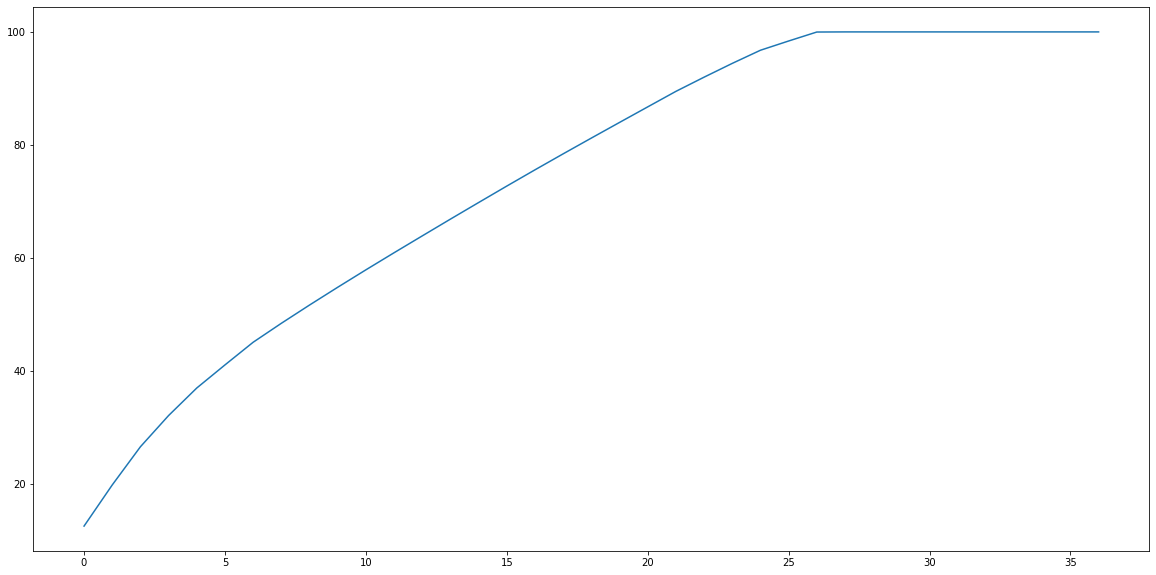

In [161]:
plt.plot(var_report['CumSum']);

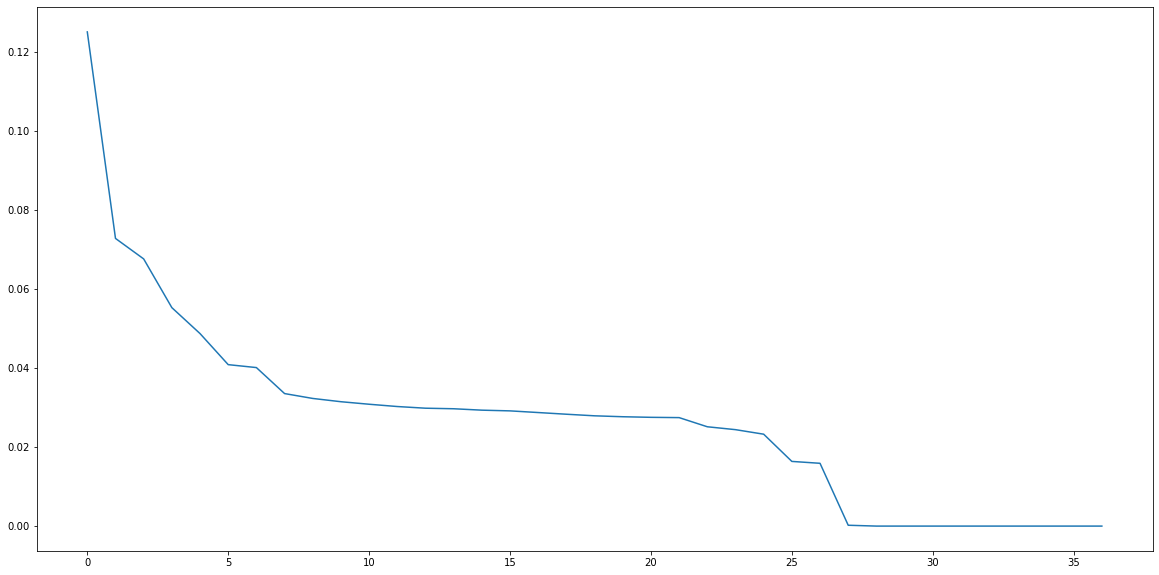

In [162]:
# let see it from another perspective
plt.plot(pca.explained_variance_ratio_)

In [163]:
#keep 26 components
pca_scaled_train = pca_scaled_counter_train.iloc[:,0:27]
pca_scaled_test = pca_scaled_counter_test.iloc[:,0:27]

In [164]:
pca_scaled_test.shape, pca_scaled_train.shape

((1705, 27), (6818, 27))

### Some exploration of train data set after standardizing data

IndexError: index 8 is out of bounds for axis 0 with size 8

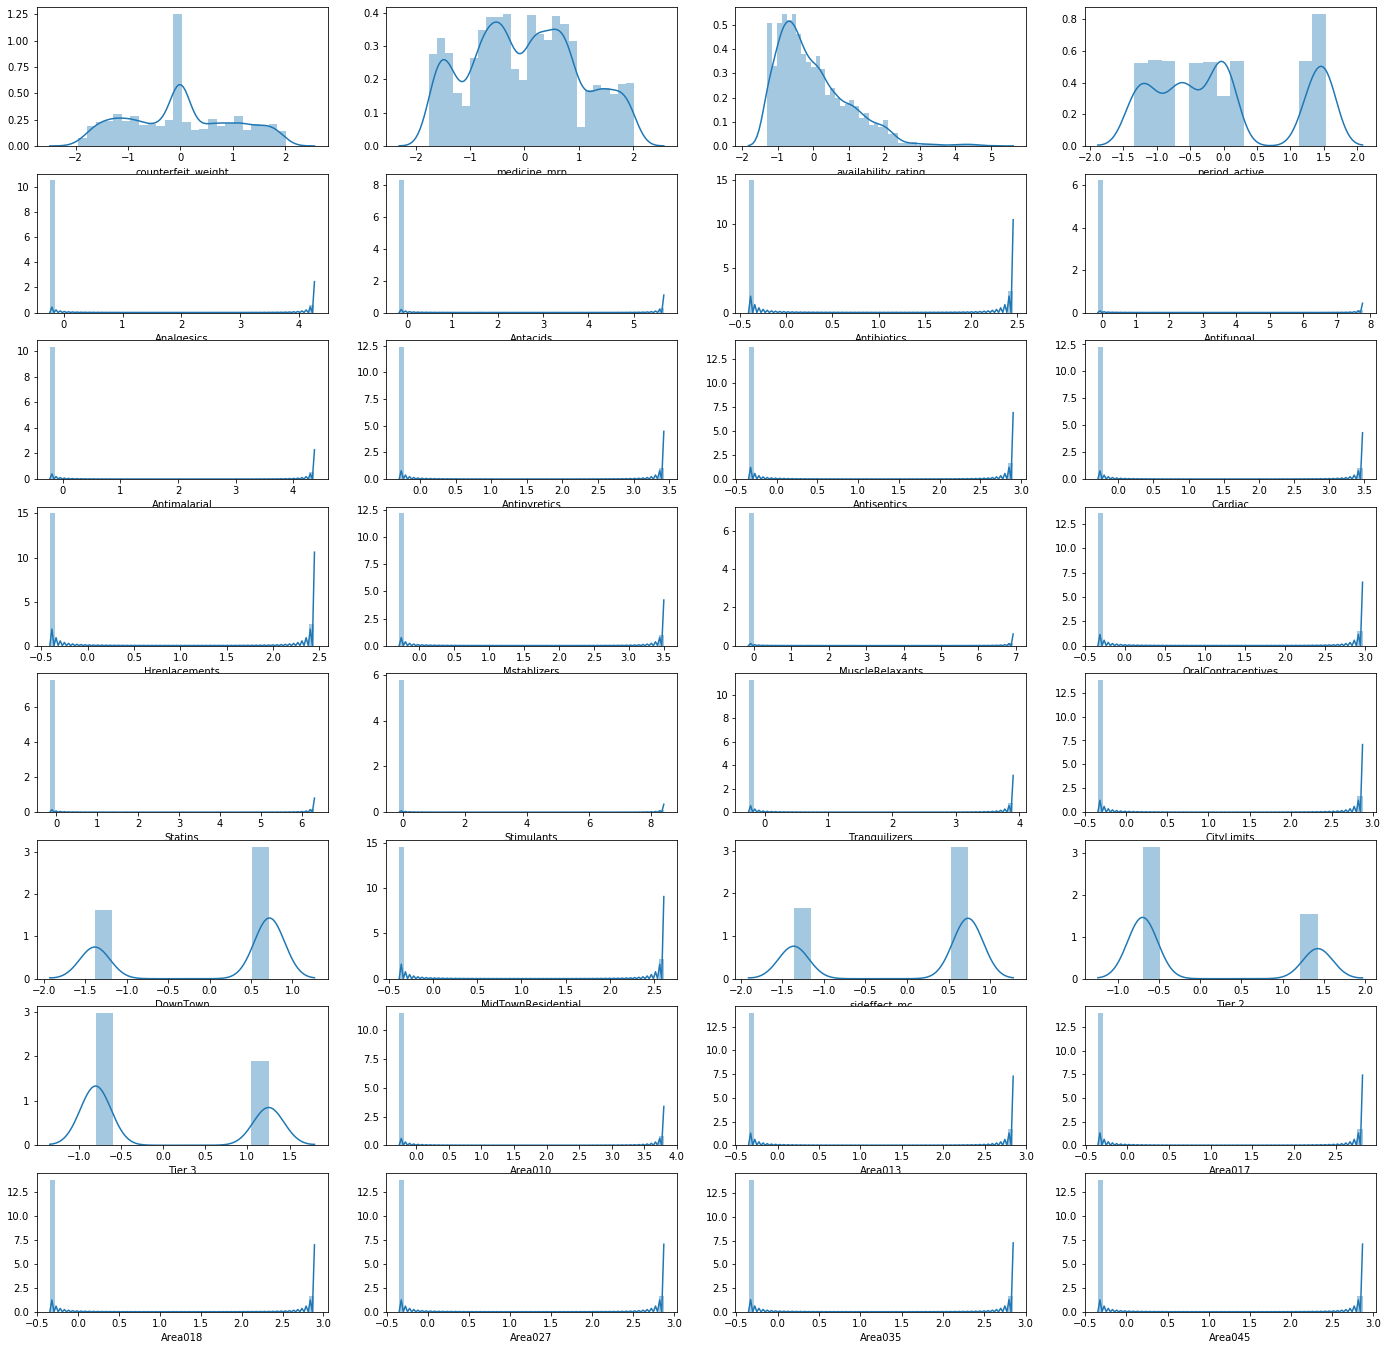

In [165]:
#Distribution of training data
fig, axs = plt.subplots(8, 4, figsize=(24,24))
for ix, col in enumerate(scaled_counter_train.columns):
    p0 = ix // 4
    p1 = ix % 4
    sns.distplot(scaled_counter_train[col], ax = axs[p0, p1])
    axs[p0, p1].set(xlabel=col)

IndexError: index 4 is out of bounds for axis 0 with size 4

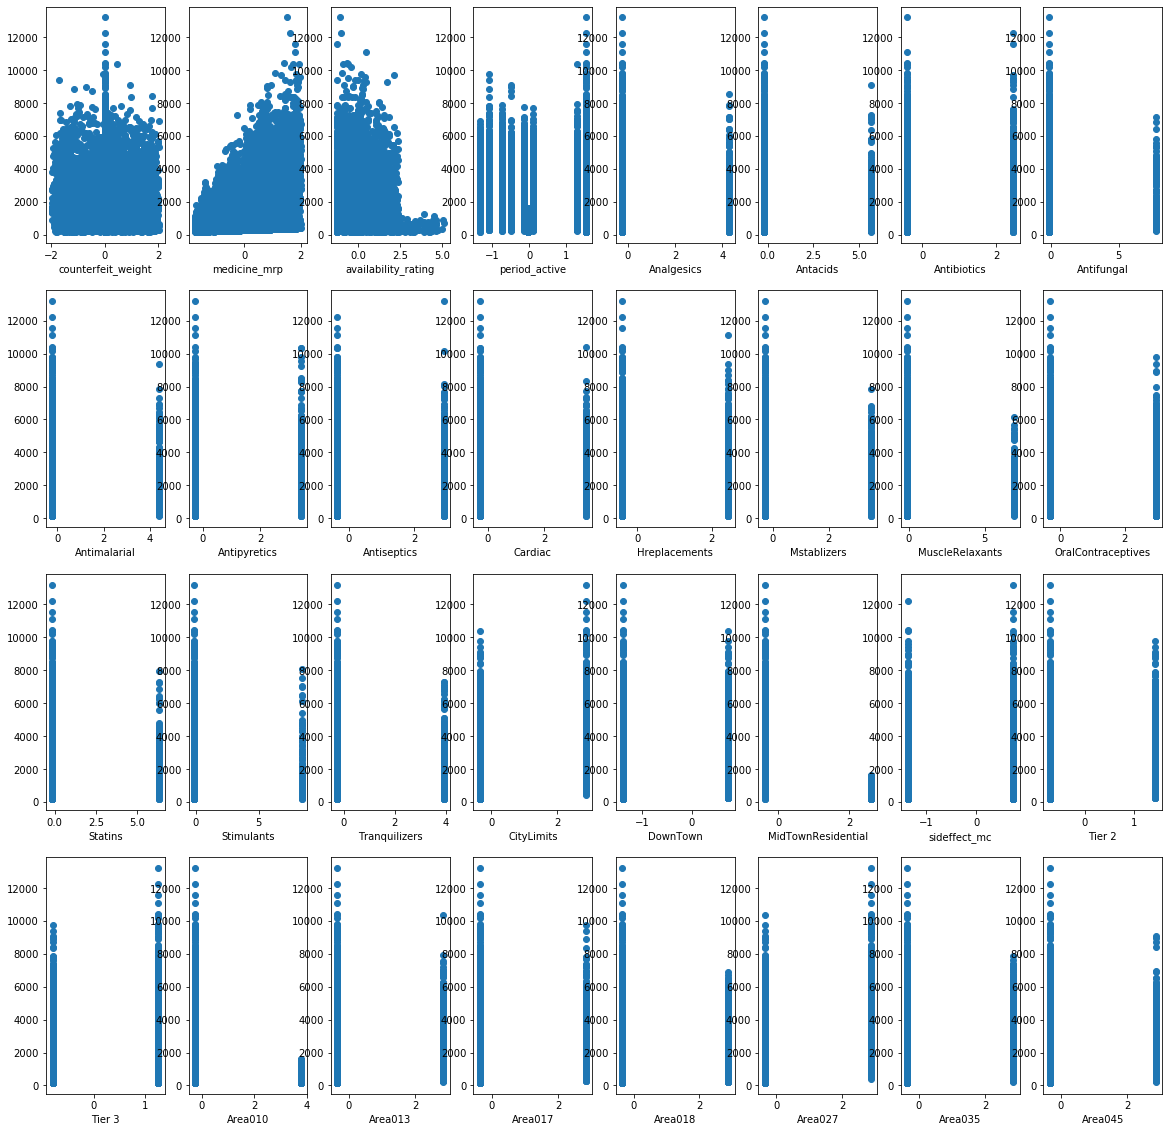

In [166]:
#features relationship with target: counterfeit sales figures
#
fig, axs = plt.subplots(4, 8, figsize=(20, 20))
for ix, feature in enumerate(scaled_counter_train.columns):
    p0 = ix // 8
    p1 = ix % 8
    axs[p0, p1].scatter(scaled_counter_train[feature], sales_figures)
    axs[p0, p1].set(xlabel=feature )


There is not much features relationship with the sales figure other than medicine_mrp which is somewhat positive. That is the rise in medicine mrp leads to increase in sales figures of counterfeit drugs. This should be further investigated

## Modeling
Under model building, we would adopt the iterative approach. We would build a basic model with a simple algorithm and evaluate performance therefrom accordingly. Then we would build a couple of 'out of the box models',evaluate the performance of these model and subsequently pick the two models with highest performance  metrics. We would then carryout hyper-parameter tuning of the two models to improve performance to satisfaction. This is further broken down below:

Basic  Model:
* Linear Regression

Out of the box model:
* Support Vector Machine
* Naive Bayes
* KN-Neighbor
* Decision Tree
* Random Forest

* Xgboost


#### Basic Model
**Linear Regression**
* Linear regression, simply put is about extracting a mathematical equation from the data,which explains how the variable of interest, in our current case, the counterfeit sales figure, is affected by other variables in the data.

Mathematical foundation
* Multiple Linear regression: 
$\displaystyle Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_n X_n$

$\displaystyle\beta_1 = \frac {\Sigma( x - \bar{x})(y - \bar{y})}{\Sigma( x  -\bar{x})^2}$ $\to$ $\displaystyle\beta_1 = 
\frac{\Sigma xy -\frac{\Sigma x\Sigma y}{n}}{\Sigma x^2 - \frac{(\Sigma x)^2}{n}}$  
$\beta_0 = \bar{y}-\beta_1\bar{x}$

The ultimate goal is to minimize the error : $\displaystyle\sum_{i = 0}^n(Y - \beta_0 - \beta_1 X)^2$

In [167]:
# we would be using a unique scoring metric which is 1-(mean absolute error/1660)
kf = KFold(n_splits=5, random_state=42, shuffle=True)
X = train_counter_w_o_spca.as_matrix()
Y = sales_figures.values.ravel()
X_test = test_counter_w_o_spca
model = LinearRegression()
scores = cross_val_score(model, X, Y, cv=kf, scoring= 'neg_mean_absolute_error')
print('MAE score - Linear Regression:', scores.mean())
print('Customise score(1-MAE/1660) - Linear Regression:',1-(scores/1660))


MAE score - Linear Regression: -828.2347774265166
Customise score(1-MAE/1660) - Linear Regression: [1.50761815 1.50562401 1.48935551 1.49895664 1.49312876]


/Users/ajakaiye/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [168]:
# manual cross validation procedure- with same Mean Absolute Error results
from sklearn.model_selection import KFold
counter = 0
for trainIdx, valIdx in KFold(n_splits = 5, random_state = 42, shuffle=True).split(X,Y):
    print('Running for fold:', counter)
    X_train, y_train, X_val, y_val = X[trainIdx, :], Y[trainIdx], X[valIdx, :], Y[valIdx]
    
    model = LinearRegression(fit_intercept=True, normalize=False)
    model.fit(X_train, y_train)
    predy_train = model.predict(X_train)
    mae = mean_absolute_error(y_train, predy_train)
    r2 = r2_score(y_train,predy_train)
    print('mae',mae)
    print('r2:', r2)
    predy_val = model.predict(X_val)
    mae_val = mean_absolute_error(y_val,predy_val)
    print('val mae:', mae_val.mean())
    print('val R2:', r2)
    
    counter += 1


Running for fold: 0
mae 820.0476642304728
r2: 0.5659752340926201
val mae: 842.6461308850078
val R2: 0.5659752340926201
Running for fold: 1
mae 820.7684249210408
r2: 0.5687383269423936
val mae: 839.3358544946492
val R2: 0.5687383269423936
Running for fold: 2
mae 828.5755935462258
r2: 0.567825716085963
val mae: 812.3301429658674
val R2: 0.567825716085963
Running for fold: 3
mae 824.1872371433382
r2: 0.5678206991361914
val mae: 828.2680236048674
val R2: 0.5678206991361914
Running for fold: 4
mae 828.3051400832718
r2: 0.5727339444338733
val mae: 818.5937351821915
val R2: 0.5727339444338733


### Out-of-the-box Models
As we earlier said we would build our model using the other versions of our data with five other algorithms and subsequently pick the two best in terms of performance for further tuning and processing.


In [169]:
scaled_train = scaled_counter_train.as_matrix()
pca_scaled_train = pca_scaled_counter_train.as_matrix()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

/Users/ajakaiye/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/Users/ajakaiye/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [170]:
X_variants = [scaled_train, pca_scaled_train]
X_names = ['X with scaling only', 'X with pca']
for train_X, X_name in zip(X_variants, X_names):
    print('Data:', X_name)
    
    decision_tree = DecisionTreeRegressor()
    decision_tree_score = cross_val_score(decision_tree, train_X, Y, cv=kf, scoring='neg_mean_absolute_error')
    print('Mean MAE Score - Decision Trees:', decision_tree_score.mean())
    
    random_forest = RandomForestRegressor()
    random_forest_score = cross_val_score(random_forest, train_X, Y, cv=kf, scoring='neg_mean_absolute_error')
    print('Mean MAE Score - Random Forest:', random_forest_score.mean())
    
    #naive_bayes = GaussianNB()
    #naive_bayes_score = cross_val_score(naive_bayes, train_X, Y, cv=5, scoring='neg_mean_absolute_error')
    #print('Mean MEA Score- Naive Bayes:', naive_bayes_score.mean())
    
    knn = KNeighborsRegressor()
    knn_score = cross_val_score(knn, train_X, Y, cv=kf, scoring='neg_mean_absolute_error')
    print('Mean MAE Score - KNN:', knn_score.mean())

Data: X with scaling only
Mean MAE Score - Decision Trees: -1077.1052317376066


/Users/ajakaiye/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ajakaiye/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ajakaiye/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ajakaiye/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.

Mean MAE Score - Random Forest: -818.6714973953416
Mean MAE Score - KNN: -899.3786646645725
Data: X with pca
Mean MAE Score - Decision Trees: -1103.7187072664449


/Users/ajakaiye/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ajakaiye/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ajakaiye/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ajakaiye/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.

Mean MAE Score - Random Forest: -842.2620138734916
Mean MAE Score - KNN: -899.3786646645725


### Evaluation
From the results above, since our metric is mean absolute error, the lower would be the better. To this end we can see that only Random Forest using the scaled version of our data has the lowest score which is an  improvement on our base model.

We would channel our effort to improve on these scores by fine tunning the hyper-parameters of the Linear regression and Random forest algorithms alternatively we may take a critical look at our features for possible re-engineering. We would have verified our performance on the test portion of the data if we had the target variable therein.Meanwhile we can rely on the performance from our validation portion of data through cross validation.

It is common knowledge that building models and applying algorithms is not a one size fit all scenario. This is the logic behind trying different model and the aim is really to see which model is better at this particular data at hand. To this end we would have to reconsider our earlier decision of picking two of the the best performing-in this case, the algorithm that reduces our Mean Absolute error the most- out of the bag models algorithms. From the result thus far we shall go ahead and fine tune the hyper-parameters of  the Linear regression and the Random Forest because the models built using these algorithms appears to produce results that are close to our objective of reducing the mean absolute error.


### Hyper-parameter tuning for Linear Regression and Random Forest

In [171]:
# Fine tune alpha hyper-parameter for linear regression
X_scale = scaled_counter_train.as_matrix()

best_alpha = None
best_mae = None
for alpha in [1e-6,1e-5,1e-4, 1e-3, 1e-2,1e-1, 1., 10., 1000.]:
    print('Training Linear model with L2 regularization for alpha=', alpha)
    counter = 0
    all_fold_mae = []
    
    for trainidx, validx in KFold(n_splits=5, random_state= 42).split(X_scale, Y):
        print('Running fold:', counter)
        X_train, y_train, X_val, y_val = X_scale[trainidx, :], Y[trainidx], X_scale[validx, :], Y[validx]
        
    
        #trainthe model
        model = Ridge(fit_intercept=True, normalize=False,alpha=alpha)
        model.fit(X_train, y_train)
    
        pred_train = model.predict(X_train)
    
        mae = mean_absolute_error(y_train, pred_train)
    
        pred_val = model.predict(X_val)
    
        mae = mean_absolute_error(y_val, pred_val)
        counter += 1
    
        all_fold_mae.append(mae)
    
        averagemae = np.mean(all_fold_mae)
        
        print('Avg CV mae', averagemae)
    
        if best_mae is None:
            best_alpha, best_mae = alpha, averagemae
        elif best_mae < averagemae:
            best_alpha, best_mae = alpha, averagemae
    
        print('Best alpha:', best_alpha)
        print('Best mae:', best_mae)
        
    
    



/Users/ajakaiye/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Training Linear model with L2 regularization for alpha= 1e-06
Running fold: 0
Avg CV mae 826.4929958329542
Best alpha: 1e-06
Best mae: 826.4929958329542
Running fold: 1
Avg CV mae 822.9175722613788
Best alpha: 1e-06
Best mae: 826.4929958329542
Running fold: 2
Avg CV mae 832.7902263817722
Best alpha: 1e-06
Best mae: 832.7902263817722
Running fold: 3
Avg CV mae 826.7539266459628
Best alpha: 1e-06
Best mae: 832.7902263817722
Running fold: 4
Avg CV mae 829.3504650111165
Best alpha: 1e-06
Best mae: 832.7902263817722
Training Linear model with L2 regularization for alpha= 1e-05
Running fold: 0
Avg CV mae 826.4929953615477
Best alpha: 1e-06
Best mae: 832.7902263817722
Running fold: 1
Avg CV mae 822.9175720578883
Best alpha: 1e-06
Best mae: 832.7902263817722
Running fold: 2
Avg CV mae 832.7902262389953
Best alpha: 1e-06
Best mae: 832.7902263817722
Running fold: 3
Avg CV mae 826.7539265180865
Best alpha: 1e-06
Best mae: 832.7902263817722
Running fold: 4
Avg CV mae 829.3504648634056
Best alpha: 

In [176]:
# hyper-parameter tunning for random forest
# check cross validation
foldmae = []
for trainIdx, ValidIdx in KFold(n_splits=10, random_state=42).split(X_scale, Y):
    X_train, y_train =  X_scale[trainIdx, :], Y[trainIdx]
    X_val, y_val =  X_scale[ValidIdx, :], Y[ValidIdx]
    
    model = RandomForestRegressor(n_estimators=100)

    #on train set
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    mean_abso = mean_absolute_error(y_train, pred_train)
    
    #on valid. set
    pred_val = model.predict(X_val)
    
    mean_abso = mean_absolute_error(y_val, pred_val)
    
    foldmae.append(mean_abso)
    print('val MAE:',mean_absolute_error(y_val, pred_val))
    print('Train MAE:',mean_absolute_error(y_train, pred_train))
    print('Mean MAE ---- Random Forest', np.mean(foldmae))
    
    
    


val MAE: 727.7646294926686
Train MAE: 293.94252072946546
Mean MAE ---- Random Forest 727.7646294926686
val MAE: 826.1428372316714
Train MAE: 288.7577898617992
Mean MAE ---- Random Forest 776.9537333621699
val MAE: 774.2674012052785
Train MAE: 290.80211487288136
Mean MAE ---- Random Forest 776.0582893098727
val MAE: 754.7519636334309
Train MAE: 291.7252222672751
Mean MAE ---- Random Forest 770.7317078907623
val MAE: 830.5640713929618
Train MAE: 287.995286101043
Mean MAE ---- Random Forest 782.6981805912022
val MAE: 763.9177842668621
Train MAE: 293.960713041721
Mean MAE ---- Random Forest 779.5681145371456
val MAE: 769.8443902756597
Train MAE: 291.28773329041724
Mean MAE ---- Random Forest 778.1790110712191
val MAE: 781.4477418064515
Train MAE: 292.0854378624511
Mean MAE ---- Random Forest 778.587602413123
val MAE: 802.6493434743024
Train MAE: 291.42991957796966
Mean MAE ---- Random Forest 781.2611291976986
val MAE: 818.8834050660793
Train MAE: 290.10019970083107
Mean MAE ---- Random For

Interesting results but it's obvious that it has over-fitting written all over it as there are significant differences between the validation results and the train results. Would need to carry out hyper-parameter tunning to see whether our results would improve i.e reduce the MAE

In [177]:
#Let test the result with the test data set before carrying out the hyper-parameter tuning 
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_scale, Y)
pred_test = rf_model.predict(scaled_counter_test)
pd.DataFrame(pred_test).to_csv('test_sub.csv',index=False)

In [185]:
# Random forest Hyper Parameters
max_depth_list = [2, 3, 4, 5,6,7,8,9,10]
min_samples_split_list = [2, 10, 20, 30, 40, 50]
max_features_list = [0.3, 0.5, 0.7, 0.9,0.10,0.11,0.12,0.15]

In [186]:
import itertools

In [187]:
# get the length of the grid
len(list(itertools.product(max_depth_list, min_samples_split_list, max_features_list)))

432

In [188]:
best_params = None
best_score = None

for max_depth, min_samples_split, max_features in itertools.product(max_depth_list, min_samples_split_list, max_features_list):
    print("Evaluation max_depth, min_samples_split, max_features:", max_depth, min_samples_split, max_features)
    fold_wise_scores = []
    
    for train_ind, valid_ind in KFold(n_splits=10, random_state= 42).split(X_scale, Y):
        X_train, y_train = X_scale[train_ind, :], Y[train_ind]
        valid_X, valid_y = X_scale[valid_ind, :], Y[valid_ind]
        
        model = RandomForestRegressor(n_estimators=100,
                                      max_depth=max_depth,
                                      min_samples_split=min_samples_split,
                                      max_features=max_features)
        model.fit(X_train,y_train)
        
        #on train:
        preddy_train = model.predict(X_train)
        print('Train MAE:', mean_absolute_error(y_train, preddy_train))
        
        #on validation set
        
        predy_val = model.predict(valid_X)
        print('Valid MAE:', mean_absolute_error(valid_y, predy_val))
        
        #use validation scores only
        fold_wise_scores.append(mean_absolute_error(valid_y, predy_val))
        avg_Mae_score = np.mean(fold_wise_scores)
        if best_score is None:
            best_score = avg_Mae_score
            best_params = {'max_depth': max_depth, 'min_samples_split':min_samples_split, 'max_features': max_features}
            print('best score and params found', best_score, best_params)
        elif best_score > avg_Mae_score:
            best_score = avg_Mae_score
            best_params = {'max_dept':max_depth, 'min_samples_split': min_samples_split, 'max_features': max_features}
            print('Best score and params found', best_score, best_params)

Evaluation max_depth, min_samples_split, max_features: 2 2 0.3
Train MAE: 1004.2590452991471
Valid MAE: 1001.4789105348666
best score and params found 1001.4789105348666 {'max_depth': 2, 'min_samples_split': 2, 'max_features': 0.3}
Train MAE: 991.9742393289897
Valid MAE: 1038.6319310880106
Train MAE: 993.6840218163018
Valid MAE: 933.7308415822122
Best score and params found 991.2805610683631 {'max_dept': 2, 'min_samples_split': 2, 'max_features': 0.3}
Train MAE: 995.7934294147021
Valid MAE: 1010.4072708893701
Train MAE: 1001.7520459692203
Valid MAE: 1053.965530609337
Train MAE: 1018.7764628606246
Valid MAE: 1020.3163676516319
Train MAE: 995.366880306961
Valid MAE: 1008.3348945293692
Train MAE: 1006.1862249826099
Valid MAE: 971.4748228242755
Train MAE: 993.4428071740041
Valid MAE: 995.0247542812186
Train MAE: 1003.1008414954147
Valid MAE: 1003.8002126934513
Evaluation max_depth, min_samples_split, max_features: 2 2 0.5
Train MAE: 930.850642180319
Valid MAE: 928.0118380209301
Best score 

Train MAE: 893.5245876780257
Valid MAE: 910.0871791499721
Train MAE: 895.7093342776224
Valid MAE: 895.5705991715698
Evaluation max_depth, min_samples_split, max_features: 2 10 0.1
Train MAE: 1191.4195700112164
Valid MAE: 1219.1389524404394
Train MAE: 1192.8587150807768
Valid MAE: 1229.2859911096477
Train MAE: 1197.142979458611
Valid MAE: 1122.4358919400456
Train MAE: 1206.0400547816087
Valid MAE: 1236.3789274474939
Train MAE: 1203.2438167020362
Valid MAE: 1255.418300974603
Train MAE: 1172.9052205621313
Valid MAE: 1176.9468747702876
Train MAE: 1195.4162400820246
Valid MAE: 1229.595812931514
Train MAE: 1200.6616890743585
Valid MAE: 1152.8421429323491
Train MAE: 1199.3267811869534
Valid MAE: 1169.9436157817313
Train MAE: 1206.8433081717305
Valid MAE: 1196.2908366466847
Evaluation max_depth, min_samples_split, max_features: 2 10 0.11
Train MAE: 1161.184214218524
Valid MAE: 1182.4879426058553
Train MAE: 1157.6481000847305
Valid MAE: 1198.6150244387823
Train MAE: 1161.4025271051948
Valid MAE

Train MAE: 1002.5739006403189
Valid MAE: 1017.827661484369
Train MAE: 981.7833618527651
Valid MAE: 1033.5900695623766
Train MAE: 998.3764702277911
Valid MAE: 999.188426441695
Train MAE: 985.961257729023
Valid MAE: 1000.88087464074
Train MAE: 1011.6514795867546
Valid MAE: 977.2469332031028
Train MAE: 997.769231573365
Valid MAE: 997.3483894026112
Train MAE: 1009.3863469459832
Valid MAE: 1010.5588225391465
Evaluation max_depth, min_samples_split, max_features: 2 30 0.5
Train MAE: 942.5924065781055
Valid MAE: 932.4582919346377
Train MAE: 927.5474359669205
Valid MAE: 980.7272342745142
Train MAE: 934.7799877083878
Valid MAE: 891.3143653233824
Train MAE: 944.0746609751736
Valid MAE: 952.6243467555566
Train MAE: 923.2757122731438
Valid MAE: 967.8471639492785
Train MAE: 936.1553536682475
Valid MAE: 947.5044122993006
Train MAE: 932.6201117240704
Valid MAE: 935.92851947122
Train MAE: 946.5784949850411
Valid MAE: 913.6714184083945
Train MAE: 944.6116655623648
Valid MAE: 949.8111588683722
Train MAE

Train MAE: 1191.8815279729395
Valid MAE: 1163.3496724725462
Train MAE: 1176.1422341012876
Valid MAE: 1172.7048672357014
Evaluation max_depth, min_samples_split, max_features: 2 40 0.11
Train MAE: 1138.1814126248312
Valid MAE: 1153.4151303600704
Train MAE: 1170.552430214549
Valid MAE: 1206.923194285414
Train MAE: 1147.209992571871
Valid MAE: 1078.6106598604113
Train MAE: 1162.800849593049
Valid MAE: 1191.4616572011355
Train MAE: 1148.4502124391079
Valid MAE: 1196.1957203189709
Train MAE: 1166.5566282396467
Valid MAE: 1166.8727726431746
Train MAE: 1110.9434797150295
Valid MAE: 1141.324522988682
Train MAE: 1146.3338743295403
Valid MAE: 1100.332548647116
Train MAE: 1178.1347719564744
Valid MAE: 1150.8560274588265
Train MAE: 1151.5413162842572
Valid MAE: 1148.9327094724704
Evaluation max_depth, min_samples_split, max_features: 2 40 0.12
Train MAE: 1131.3905258259126
Valid MAE: 1148.1731619014133
Train MAE: 1147.4303336571322
Valid MAE: 1189.4297961507868
Train MAE: 1159.5600286590773
Valid 

Train MAE: 836.6026252924904
Valid MAE: 806.0882321713198
Train MAE: 833.8240506913633
Valid MAE: 831.6711415421659
Train MAE: 820.1884929787241
Valid MAE: 867.1160599264532
Train MAE: 834.658878394233
Valid MAE: 849.9481779397953
Train MAE: 829.8564521329176
Valid MAE: 820.6554587645142
Train MAE: 841.6967235841659
Valid MAE: 828.0834339334842
Train MAE: 834.8995643114877
Valid MAE: 858.8401646486857
Train MAE: 821.1041861160678
Valid MAE: 823.4904839111854
Evaluation max_depth, min_samples_split, max_features: 3 2 0.7
Train MAE: 807.5516127464633
Valid MAE: 785.1193191624299
Best score and params found 785.1193191624299 {'max_dept': 3, 'min_samples_split': 2, 'max_features': 0.7}
Train MAE: 801.5821262181886
Valid MAE: 847.3323635201052
Train MAE: 807.610601063734
Valid MAE: 784.3316940620451
Train MAE: 809.9483253181702
Valid MAE: 801.7088517728644
Train MAE: 801.7657439193918
Valid MAE: 848.7424555502547
Train MAE: 807.103419622872
Valid MAE: 825.5555895780437
Train MAE: 808.450894

Train MAE: 1079.2140988190629
Valid MAE: 1139.4635225990148
Train MAE: 1072.2505136019836
Valid MAE: 1067.9279224006764
Train MAE: 1071.829683046424
Valid MAE: 1095.4333408029095
Train MAE: 1089.0557412494866
Valid MAE: 1052.7014245781443
Train MAE: 1054.8258548599022
Valid MAE: 1049.4039895300234
Train MAE: 1065.0728369976448
Valid MAE: 1068.8563262316547
Evaluation max_depth, min_samples_split, max_features: 3 10 0.12
Train MAE: 1072.8711707983991
Valid MAE: 1077.2142220368755
Train MAE: 1073.022717066529
Valid MAE: 1116.9075671669223
Train MAE: 1072.280985929263
Valid MAE: 1007.7644255350675
Train MAE: 1084.6773010040506
Valid MAE: 1110.0370272642924
Train MAE: 1093.51071538526
Valid MAE: 1158.4835143471914
Train MAE: 1078.0647880241745
Valid MAE: 1072.042827066878
Train MAE: 1083.4187823396296
Valid MAE: 1108.5935929079292
Train MAE: 1083.7276026805941
Valid MAE: 1046.655815019511
Train MAE: 1084.909512954297
Valid MAE: 1080.2807489364195
Train MAE: 1083.965368814835
Valid MAE: 108

Train MAE: 831.3505142597378
Valid MAE: 833.3828696398659
Evaluation max_depth, min_samples_split, max_features: 3 30 0.7
Train MAE: 805.3823773057117
Valid MAE: 785.8934968256474
Train MAE: 801.0559258577603
Valid MAE: 850.2815373834885
Train MAE: 807.6083137003551
Valid MAE: 785.4060128944897
Train MAE: 804.0788301920712
Valid MAE: 795.3262902907956
Train MAE: 799.7720158200378
Valid MAE: 845.2686237871436
Train MAE: 810.2533350352372
Valid MAE: 829.3362668839553
Train MAE: 806.4694884924769
Valid MAE: 788.6155565993207
Train MAE: 806.0459697921864
Valid MAE: 791.9509291416382
Train MAE: 804.2067033317061
Valid MAE: 829.7329062393334
Train MAE: 806.3200773735234
Valid MAE: 809.4485698158825
Evaluation max_depth, min_samples_split, max_features: 3 30 0.9
Train MAE: 799.9366820120888
Valid MAE: 780.7648917000035
Train MAE: 794.2709169464288
Valid MAE: 840.8769499230174
Train MAE: 801.7072062914053
Valid MAE: 780.8263186776976
Train MAE: 800.802443485427
Valid MAE: 782.3151900918848
Tra

Train MAE: 1053.3673876563628
Valid MAE: 1071.8434672125534
Train MAE: 1058.982865249326
Valid MAE: 1115.290732838098
Train MAE: 1064.1097079756414
Valid MAE: 1061.9439332336635
Train MAE: 1069.890696814299
Valid MAE: 1091.0789309404
Train MAE: 1077.8644591118523
Valid MAE: 1039.2631653062358
Train MAE: 1083.2913001612148
Valid MAE: 1079.0521807998803
Train MAE: 1067.76462765375
Valid MAE: 1066.1799250325328
Evaluation max_depth, min_samples_split, max_features: 3 40 0.15
Train MAE: 1033.1784242624758
Valid MAE: 1028.2742762980631
Train MAE: 1037.7301941280052
Valid MAE: 1084.4674116832914
Train MAE: 1049.7421528598
Valid MAE: 987.3558840687128
Train MAE: 1044.1649745576758
Valid MAE: 1063.7258323590095
Train MAE: 1017.5926949116779
Valid MAE: 1074.2018874385494
Train MAE: 1037.2486253320437
Valid MAE: 1031.4135790347532
Train MAE: 1040.0032212205033
Valid MAE: 1061.9181613409346
Train MAE: 1042.5823514722683
Valid MAE: 1008.018527912074
Train MAE: 1027.2037055257708
Valid MAE: 1028.45

Train MAE: 760.1779455862808
Valid MAE: 754.7732706050328
Train MAE: 761.2824039752778
Valid MAE: 795.2582648522296
Train MAE: 756.2130085702718
Valid MAE: 779.4662426529349
Evaluation max_depth, min_samples_split, max_features: 4 2 0.9
Train MAE: 756.1332305167138
Valid MAE: 716.6281244927706
Best score and params found 716.6281244927706 {'max_dept': 4, 'min_samples_split': 2, 'max_features': 0.9}
Train MAE: 748.8194627599379
Valid MAE: 785.2187123120908
Train MAE: 753.2760599342075
Valid MAE: 754.087198960463
Train MAE: 756.3123820022294
Valid MAE: 732.4598355870306
Train MAE: 748.3507887367975
Valid MAE: 800.1122983817354
Train MAE: 752.8941152303423
Valid MAE: 752.9374562153015
Train MAE: 753.5191751295671
Valid MAE: 755.6028833535311
Train MAE: 756.1167755620355
Valid MAE: 750.2720474455223
Train MAE: 750.129765741323
Valid MAE: 789.2422238592296
Train MAE: 749.7965219516886
Valid MAE: 780.653254383749
Evaluation max_depth, min_samples_split, max_features: 4 2 0.1
Train MAE: 1051.

Train MAE: 965.6310915622649
Valid MAE: 910.4328203342426
Train MAE: 969.4190704079534
Valid MAE: 984.8813414041409
Train MAE: 948.097412206725
Valid MAE: 1013.3731602770184
Train MAE: 958.7160877645666
Valid MAE: 953.9873774909382
Train MAE: 957.2165643788175
Valid MAE: 971.4312776356826
Train MAE: 993.9169327576943
Valid MAE: 972.0322721468588
Train MAE: 952.840885348772
Valid MAE: 968.0379060460278
Train MAE: 947.7366352548469
Valid MAE: 957.9564810560962
Evaluation max_depth, min_samples_split, max_features: 4 20 0.3
Train MAE: 857.3670604221314
Valid MAE: 839.4349249261302
Train MAE: 834.447453036055
Valid MAE: 879.0862103835124
Train MAE: 844.4314001841022
Valid MAE: 809.0982413274476
Train MAE: 841.174883363328
Valid MAE: 843.281004024254
Train MAE: 838.4328411095967
Valid MAE: 903.82235208148
Train MAE: 846.3693623803532
Valid MAE: 846.7512330532438
Train MAE: 843.1316022400433
Valid MAE: 839.9532921187729
Train MAE: 840.0541064707709
Valid MAE: 829.369733789777
Train MAE: 856.

Train MAE: 1052.2532424800888
Valid MAE: 1052.4365025561017
Train MAE: 1039.572256343843
Valid MAE: 1084.085756901097
Train MAE: 1065.0035393505132
Valid MAE: 1003.5005293566398
Train MAE: 1055.0891804205296
Valid MAE: 1073.915944459493
Train MAE: 1049.3770405538355
Valid MAE: 1114.9665212835953
Train MAE: 1070.1156608641425
Valid MAE: 1069.6960594994368
Train MAE: 1043.7527002285533
Valid MAE: 1065.3605500755962
Train MAE: 1072.7928457904816
Valid MAE: 1034.440089267708
Train MAE: 1060.299871909871
Valid MAE: 1063.3478004195547
Train MAE: 1056.2445592438116
Valid MAE: 1063.251050042828
Evaluation max_depth, min_samples_split, max_features: 4 30 0.11
Train MAE: 1017.0921961679063
Valid MAE: 1006.876609055889
Train MAE: 984.7064527483694
Valid MAE: 1029.0257367429022
Train MAE: 1006.3648032979045
Valid MAE: 951.6692486666211
Train MAE: 997.4639706711772
Valid MAE: 1018.1515180985031
Train MAE: 1007.3693589771299
Valid MAE: 1074.2359647286949
Train MAE: 1021.2258082744462
Valid MAE: 1019

Train MAE: 847.4227128589303
Valid MAE: 836.6243645830579
Train MAE: 833.997454295332
Valid MAE: 861.6880020924374
Train MAE: 824.9499663961245
Valid MAE: 834.8239090375567
Evaluation max_depth, min_samples_split, max_features: 4 50 0.5
Train MAE: 794.0605171293076
Valid MAE: 764.7042927466006
Train MAE: 772.8447480746908
Valid MAE: 813.5826507258332
Train MAE: 782.685495658663
Valid MAE: 767.9400739139971
Train MAE: 794.1611545784046
Valid MAE: 787.1845326350781
Train MAE: 776.1393051789435
Valid MAE: 831.4418504855898
Train MAE: 783.1564535670528
Valid MAE: 790.1833862273386
Train MAE: 779.740248267435
Valid MAE: 776.4173279803475
Train MAE: 788.205780260736
Valid MAE: 786.5286605037464
Train MAE: 779.1313172582551
Valid MAE: 810.6110226097387
Train MAE: 786.3204878548306
Valid MAE: 799.1700471423787
Evaluation max_depth, min_samples_split, max_features: 4 50 0.7
Train MAE: 762.875222623672
Valid MAE: 727.3550064468114
Train MAE: 754.6534762205102
Valid MAE: 793.7017574223773
Train M

Train MAE: 965.5757912181432
Valid MAE: 956.8987876568889
Train MAE: 961.9620312280754
Valid MAE: 1007.4155132523578
Train MAE: 954.5182544885685
Valid MAE: 905.5620751250134
Train MAE: 958.3898493525863
Valid MAE: 977.9823663089096
Train MAE: 955.038789962623
Valid MAE: 1028.8198583335206
Train MAE: 936.5878565382933
Valid MAE: 938.1587163727195
Train MAE: 944.8915717244115
Valid MAE: 957.2722101528007
Train MAE: 961.6489795769133
Valid MAE: 940.256935134991
Train MAE: 955.4202280311883
Valid MAE: 972.6566532347266
Train MAE: 929.2282870693471
Valid MAE: 943.5914550725549
Evaluation max_depth, min_samples_split, max_features: 5 2 0.12
Train MAE: 954.403901627455
Valid MAE: 947.3302999348998
Train MAE: 933.6206329494328
Valid MAE: 982.5993750045172
Train MAE: 970.4978400524828
Valid MAE: 919.3445856103525
Train MAE: 948.7454012112432
Valid MAE: 970.9081271182009
Train MAE: 966.4920242008925
Valid MAE: 1040.3198998618882
Train MAE: 947.8244239757022
Valid MAE: 945.6956398501724
Train MA

Train MAE: 750.5025955644765
Valid MAE: 776.0958423124595
Evaluation max_depth, min_samples_split, max_features: 5 20 0.7
Train MAE: 742.2013035617948
Valid MAE: 707.750378067654
Train MAE: 733.9589607409806
Valid MAE: 776.12842124353
Train MAE: 739.5334688166192
Valid MAE: 742.7332670152641
Train MAE: 742.4804756967364
Valid MAE: 722.9541336624409
Train MAE: 732.3948116758996
Valid MAE: 791.3024816499754
Train MAE: 738.7895886639301
Valid MAE: 744.7604325985028
Train MAE: 737.984304599892
Valid MAE: 745.0999826328595
Train MAE: 739.7494053773432
Valid MAE: 744.7213270924213
Train MAE: 734.7078887728057
Valid MAE: 776.6003886937903
Train MAE: 735.0581013985332
Valid MAE: 766.2006062436059
Evaluation max_depth, min_samples_split, max_features: 5 20 0.9
Train MAE: 740.7402753522849
Valid MAE: 700.3709581828616
Best score and params found 700.3709581828616 {'max_dept': 5, 'min_samples_split': 20, 'max_features': 0.9}
Train MAE: 732.462081868508
Valid MAE: 771.6302387139971
Train MAE: 736.

Train MAE: 939.8839284431643
Valid MAE: 1015.2694595442134
Train MAE: 948.5293797745522
Valid MAE: 946.9928938863267
Train MAE: 942.8391611161869
Valid MAE: 955.8632596256634
Train MAE: 945.4333578771505
Valid MAE: 927.2782245984737
Train MAE: 954.2622243785864
Valid MAE: 974.0534639819369
Train MAE: 938.4668964736028
Valid MAE: 952.0451610599482
Evaluation max_depth, min_samples_split, max_features: 5 30 0.15
Train MAE: 919.5791517146338
Valid MAE: 904.7187909609165
Train MAE: 904.0769479515067
Valid MAE: 949.179570111133
Train MAE: 935.4408004968634
Valid MAE: 886.0906608205007
Train MAE: 938.6919921342131
Valid MAE: 954.1542870536798
Train MAE: 905.816930851461
Valid MAE: 978.5666273488247
Train MAE: 911.7729113931301
Valid MAE: 910.1332481216662
Train MAE: 920.2584676918477
Valid MAE: 928.8910076152025
Train MAE: 929.7552645600954
Valid MAE: 908.9741207215856
Train MAE: 908.0865704732197
Valid MAE: 931.7062563142728
Train MAE: 933.2770087396829
Valid MAE: 948.8264590324366
Evaluati

Train MAE: 737.1573314880081
Valid MAE: 739.4258787950523
Train MAE: 740.179228297129
Valid MAE: 717.898067382312
Train MAE: 731.1293031340042
Valid MAE: 789.8731653612238
Train MAE: 736.6601628677734
Valid MAE: 746.6094841027691
Train MAE: 736.3487481595079
Valid MAE: 743.6524293520486
Train MAE: 737.9983509675735
Valid MAE: 740.2333799032382
Train MAE: 733.5026336362049
Valid MAE: 776.5153042965233
Train MAE: 734.3986253587066
Valid MAE: 767.1855889714853
Evaluation max_depth, min_samples_split, max_features: 5 50 0.1
Train MAE: 1022.3392616214297
Valid MAE: 1017.0962265256261
Train MAE: 1001.7279276009755
Valid MAE: 1047.2226305365332
Train MAE: 1017.9225574930309
Valid MAE: 965.3368774645943
Train MAE: 1020.7355980274759
Valid MAE: 1040.5390804410715
Train MAE: 995.2783966806503
Valid MAE: 1062.7621409298347
Train MAE: 1021.1325533006409
Valid MAE: 1016.1170003321952
Train MAE: 1009.7947705572014
Valid MAE: 1029.562751856577
Train MAE: 1014.8849628529953
Valid MAE: 985.981434233583

Train MAE: 876.378987359463
Valid MAE: 903.2572562428331
Evaluation max_depth, min_samples_split, max_features: 6 10 0.3
Train MAE: 767.6832929890945
Valid MAE: 749.494776722283
Train MAE: 772.9587561007913
Valid MAE: 825.4329265023484
Train MAE: 764.7352198413297
Valid MAE: 759.6363522708193
Train MAE: 785.0153555329096
Valid MAE: 788.4783497577926
Train MAE: 762.3825469759502
Valid MAE: 835.1751252297047
Train MAE: 775.8682290294672
Valid MAE: 786.5126363623478
Train MAE: 773.8445546247015
Valid MAE: 781.53973716745
Train MAE: 768.6854413508685
Valid MAE: 776.5767092360959
Train MAE: 756.7458405288494
Valid MAE: 801.1570405959249
Train MAE: 767.2919758827941
Valid MAE: 801.2700830569074
Evaluation max_depth, min_samples_split, max_features: 6 10 0.5
Train MAE: 736.1638407716962
Valid MAE: 713.4081817404891
Train MAE: 729.269730282589
Valid MAE: 781.9689408116335
Train MAE: 734.1428196149483
Valid MAE: 744.5326613645617
Train MAE: 735.3641158470364
Valid MAE: 729.0605019423235
Train M

Train MAE: 967.5406985840247
Valid MAE: 1019.7955881135687
Train MAE: 992.4517748920882
Valid MAE: 943.373832749856
Train MAE: 948.7436447619859
Valid MAE: 974.1700395208511
Train MAE: 961.1705100122788
Valid MAE: 1038.2729115888606
Train MAE: 967.3541592344029
Valid MAE: 966.5631495712166
Train MAE: 947.8588173959095
Valid MAE: 966.6845048917914
Train MAE: 957.7497424479022
Valid MAE: 939.8407615198255
Train MAE: 956.382701682258
Valid MAE: 980.108834919836
Train MAE: 963.7429038024663
Valid MAE: 985.3747668628271
Evaluation max_depth, min_samples_split, max_features: 6 20 0.11
Train MAE: 950.8462475631054
Valid MAE: 943.0769672366846
Train MAE: 926.2872471581327
Valid MAE: 977.9390078047836
Train MAE: 942.3197823141568
Valid MAE: 898.193284853661
Train MAE: 921.8953583497473
Valid MAE: 940.0217037437684
Train MAE: 887.0335635002458
Valid MAE: 969.4661561989362
Train MAE: 906.9863208560377
Valid MAE: 910.5642008647463
Train MAE: 906.7542638840949
Valid MAE: 921.4874896403027
Train MAE

Train MAE: 739.4515293770115
Valid MAE: 713.7197006008233
Train MAE: 732.8034111277458
Valid MAE: 781.3365212429327
Train MAE: 735.8186378407269
Valid MAE: 742.6178930944014
Train MAE: 739.427149990276
Valid MAE: 732.4496520508202
Train MAE: 732.1564035607676
Valid MAE: 800.2232203982539
Train MAE: 742.6368578208111
Valid MAE: 753.2994332874637
Train MAE: 736.9691535964386
Valid MAE: 748.5307822180623
Train MAE: 737.6063155810982
Valid MAE: 748.1505518452474
Train MAE: 734.9415583127952
Valid MAE: 782.5233591796848
Train MAE: 733.1740748372061
Valid MAE: 771.7655590660041
Evaluation max_depth, min_samples_split, max_features: 6 40 0.7
Train MAE: 731.5826255342297
Valid MAE: 702.3124062615543
Train MAE: 723.3909594417738
Valid MAE: 774.780353624922
Train MAE: 727.9463918310084
Valid MAE: 739.7097814374135
Train MAE: 731.0518994393143
Valid MAE: 716.2763686187426
Train MAE: 722.1537944050901
Valid MAE: 792.6883834670874
Train MAE: 728.2476854116618
Valid MAE: 743.6372908623608
Train MAE:

Train MAE: 916.8409429317691
Valid MAE: 934.9225718274428
Evaluation max_depth, min_samples_split, max_features: 6 50 0.12
Train MAE: 913.5906625455345
Valid MAE: 903.778917773185
Train MAE: 924.1739183072073
Valid MAE: 972.4618633671885
Train MAE: 904.3851043097936
Valid MAE: 865.1839989241929
Train MAE: 911.9609308298495
Valid MAE: 926.5022405813228
Train MAE: 930.7290365885593
Valid MAE: 1011.772028002492
Train MAE: 922.2198533015868
Valid MAE: 918.11282320643
Train MAE: 921.5143110091559
Valid MAE: 930.8687568507208
Train MAE: 918.5393508874412
Valid MAE: 905.3755623985434
Train MAE: 917.4096328822117
Valid MAE: 945.2620184211706
Train MAE: 906.6635359773902
Valid MAE: 927.2207066254149
Evaluation max_depth, min_samples_split, max_features: 6 50 0.15
Train MAE: 899.3013704020262
Valid MAE: 883.8253298859923
Train MAE: 878.7907253082512
Valid MAE: 929.356737251423
Train MAE: 902.1890468527508
Valid MAE: 858.4734847158271
Train MAE: 887.6198815472583
Valid MAE: 901.9935356597089
Trai

Train MAE: 711.710567303901
Valid MAE: 743.8976055126149
Train MAE: 707.521722302677
Valid MAE: 773.5140460353073
Train MAE: 706.5082602293261
Valid MAE: 770.0496816673624
Evaluation max_depth, min_samples_split, max_features: 7 10 0.9
Train MAE: 712.6977849906784
Valid MAE: 699.0067350430526
Train MAE: 705.4225260925924
Valid MAE: 777.5879921187857
Train MAE: 708.3052611767306
Valid MAE: 746.7206266038634
Train MAE: 711.4091769981458
Valid MAE: 717.0484243857995
Train MAE: 701.6299982774568
Valid MAE: 792.1294047949089
Train MAE: 709.8356589774556
Valid MAE: 744.3786456412597
Train MAE: 709.7528204378167
Valid MAE: 736.9214471714164
Train MAE: 709.272310309512
Valid MAE: 746.518988205502
Train MAE: 705.9007694517038
Valid MAE: 773.18330513503
Train MAE: 704.9588183960028
Valid MAE: 771.6764475494847
Evaluation max_depth, min_samples_split, max_features: 7 10 0.1
Train MAE: 938.2838471808203
Valid MAE: 937.0701725180515
Train MAE: 913.8499253489674
Valid MAE: 973.2835905008732
Train MA

Train MAE: 842.7913172169384
Valid MAE: 852.3968063488294
Train MAE: 839.0520955701793
Valid MAE: 851.2272828702701
Train MAE: 862.4693708531495
Valid MAE: 860.8816830057713
Train MAE: 847.0888628522729
Valid MAE: 883.9323095334961
Train MAE: 833.2713281727787
Valid MAE: 865.2320634532342
Evaluation max_depth, min_samples_split, max_features: 7 30 0.3
Train MAE: 757.2112257276383
Valid MAE: 743.4856204492867
Train MAE: 749.2692700888566
Valid MAE: 803.5631754942227
Train MAE: 749.5110690697163
Valid MAE: 756.2037893629287
Train MAE: 756.7175256853266
Valid MAE: 760.5766925894158
Train MAE: 737.5904716853136
Valid MAE: 816.8839773564556
Train MAE: 757.5084264617977
Valid MAE: 772.7818032185926
Train MAE: 760.3934509520321
Valid MAE: 773.3387217228055
Train MAE: 755.5316832282904
Valid MAE: 772.7951306427639
Train MAE: 755.8967316554199
Valid MAE: 800.5753760971509
Train MAE: 751.8976077472335
Valid MAE: 795.9589571652889
Evaluation max_depth, min_samples_split, max_features: 7 30 0.5
Tr

Train MAE: 953.7303043909127
Valid MAE: 1009.5016918633187
Train MAE: 951.0843382616741
Valid MAE: 910.1505626117619
Train MAE: 931.5421098175419
Valid MAE: 953.4841500328802
Train MAE: 925.2375544942992
Valid MAE: 1008.6896429256232
Train MAE: 936.9463769990464
Valid MAE: 940.8262210716425
Train MAE: 916.3479529683552
Valid MAE: 923.7565121933732
Train MAE: 925.4819882733033
Valid MAE: 911.0314645395941
Train MAE: 921.2322718501182
Valid MAE: 948.4459271413344
Train MAE: 911.7199072734558
Valid MAE: 932.8765394477474
Evaluation max_depth, min_samples_split, max_features: 7 40 0.11
Train MAE: 889.3586007101392
Valid MAE: 876.2452225174774
Train MAE: 892.2499940402481
Valid MAE: 946.8488636172237
Train MAE: 889.1058708007524
Valid MAE: 854.6846519359809
Train MAE: 888.3082196146977
Valid MAE: 906.8526268143017
Train MAE: 877.2735116840598
Valid MAE: 963.2715178721688
Train MAE: 900.8169675210853
Valid MAE: 904.7218179409153
Train MAE: 878.4647644465076
Valid MAE: 890.3202055850714
Train

Train MAE: 698.7156325488129
Valid MAE: 702.0263568677058
Train MAE: 690.4634593008842
Valid MAE: 779.6336349818504
Train MAE: 694.0716953088677
Valid MAE: 741.3256772669688
Train MAE: 695.3511469615264
Valid MAE: 720.6013084520406
Train MAE: 687.0580505166209
Valid MAE: 793.1332627723248
Train MAE: 694.071761613566
Valid MAE: 737.6255787017072
Train MAE: 693.1922019149177
Valid MAE: 735.4785260581688
Train MAE: 693.6955609081341
Valid MAE: 744.9199608472114
Train MAE: 691.7158656084488
Valid MAE: 775.258177550424
Train MAE: 689.7583307678192
Valid MAE: 773.9363431681143
Evaluation max_depth, min_samples_split, max_features: 8 2 0.7
Train MAE: 690.0804277794093
Valid MAE: 701.6301767587474
Train MAE: 684.6646761614164
Valid MAE: 778.4940610537053
Train MAE: 687.205917070758
Valid MAE: 748.452712781473
Train MAE: 690.4254300832366
Valid MAE: 722.4912471764178
Train MAE: 678.8076751760333
Valid MAE: 795.4248115749045
Train MAE: 689.107504896733
Valid MAE: 739.5789715865656
Train MAE: 687

Train MAE: 861.6852971095269
Valid MAE: 902.8858388765428
Evaluation max_depth, min_samples_split, max_features: 8 10 0.12
Train MAE: 843.8692358128372
Valid MAE: 846.9706236561603
Train MAE: 839.02955139689
Valid MAE: 912.6959637991049
Train MAE: 837.8581349933916
Valid MAE: 832.6089585984915
Train MAE: 849.502949297984
Valid MAE: 878.8901192690774
Train MAE: 850.0290490495693
Valid MAE: 949.9425460045429
Train MAE: 841.9957628592338
Valid MAE: 865.1681648396923
Train MAE: 846.4252228049743
Valid MAE: 875.3713391874832
Train MAE: 855.1897908299323
Valid MAE: 873.1674783539165
Train MAE: 856.6726725200118
Valid MAE: 906.1227166582355
Train MAE: 833.8310784705038
Valid MAE: 873.5238306848132
Evaluation max_depth, min_samples_split, max_features: 8 10 0.15
Train MAE: 814.2635781426271
Valid MAE: 820.8743219302057
Train MAE: 810.3585723206578
Valid MAE: 883.4238363647959
Train MAE: 814.6205603410526
Valid MAE: 810.929107508553
Train MAE: 811.283751324508
Valid MAE: 838.5996338610248
Train

Train MAE: 703.238339228692
Valid MAE: 745.1699792590771
Train MAE: 699.8081029189376
Valid MAE: 771.0474563945822
Train MAE: 699.1788788178973
Valid MAE: 773.1288790505155
Evaluation max_depth, min_samples_split, max_features: 8 30 0.9
Train MAE: 703.0721633951656
Valid MAE: 700.1949304190242
Train MAE: 695.6746473340465
Valid MAE: 778.0752839336086
Train MAE: 699.2220230531658
Valid MAE: 748.3761272641227
Train MAE: 703.0614524396804
Valid MAE: 719.6647119692669
Train MAE: 692.9341050471893
Valid MAE: 793.9028785503087
Train MAE: 700.0881683386862
Valid MAE: 743.2893904022459
Train MAE: 700.4103812265779
Valid MAE: 736.4639122749583
Train MAE: 700.1764894557881
Valid MAE: 746.1460514231453
Train MAE: 696.5035278733325
Valid MAE: 769.7477633055993
Train MAE: 695.3216894014905
Valid MAE: 775.954648351493
Evaluation max_depth, min_samples_split, max_features: 8 30 0.1
Train MAE: 902.725951952795
Valid MAE: 897.5390784070069
Train MAE: 887.2386696348792
Valid MAE: 949.6238301896694
Train

Train MAE: 830.6758947404404
Valid MAE: 842.6533559210842
Train MAE: 834.2642649377033
Valid MAE: 848.9906694825696
Train MAE: 826.351401505971
Valid MAE: 833.2710443021299
Train MAE: 834.5495550722261
Valid MAE: 877.0617708413832
Train MAE: 824.1895417525702
Valid MAE: 859.9407212104504
Evaluation max_depth, min_samples_split, max_features: 8 50 0.3
Train MAE: 743.4180756555273
Valid MAE: 731.0823210023914
Train MAE: 737.5324542387145
Valid MAE: 797.4197186665231
Train MAE: 737.7993465694788
Valid MAE: 748.3653295061184
Train MAE: 747.0536695686326
Valid MAE: 753.5304973760718
Train MAE: 729.3912150603757
Valid MAE: 814.0064124379182
Train MAE: 746.7723740409888
Valid MAE: 768.2937577436852
Train MAE: 737.7501582894654
Valid MAE: 755.2184018230352
Train MAE: 745.3038189045149
Valid MAE: 767.3851167325574
Train MAE: 744.0363509588676
Valid MAE: 797.2661357293553
Train MAE: 736.7300565672348
Valid MAE: 787.7195665016529
Evaluation max_depth, min_samples_split, max_features: 8 50 0.5
Tra

Train MAE: 849.157324479236
Valid MAE: 909.5908380076211
Train MAE: 840.9493572625612
Valid MAE: 969.1692068364688
Train MAE: 828.25545749167
Valid MAE: 880.5309241760435
Train MAE: 834.7201982335746
Valid MAE: 894.3510656442139
Train MAE: 828.5523929335131
Valid MAE: 861.3227276896952
Train MAE: 819.179814584458
Valid MAE: 893.2901592384508
Train MAE: 820.4956222366568
Valid MAE: 889.1011525089658
Evaluation max_depth, min_samples_split, max_features: 9 2 0.11
Train MAE: 799.0588753342593
Valid MAE: 832.2640064274749
Train MAE: 796.9524116697111
Valid MAE: 896.5576974986858
Train MAE: 805.1062637647177
Valid MAE: 828.513042915991
Train MAE: 788.1818674905787
Valid MAE: 843.6143674131306
Train MAE: 787.5635673646151
Valid MAE: 911.5478798334663
Train MAE: 803.4251540612668
Valid MAE: 851.3372576815847
Train MAE: 796.1278571122203
Valid MAE: 849.4867372376315
Train MAE: 796.3756455922244
Valid MAE: 837.466446297607
Train MAE: 791.1243800526538
Valid MAE: 867.8254002828463
Train MAE: 787

Train MAE: 686.7890794137886
Valid MAE: 779.6841364075404
Train MAE: 689.0777645366503
Valid MAE: 743.2625931137392
Train MAE: 692.5906420847964
Valid MAE: 723.8632143815084
Train MAE: 683.5330978822223
Valid MAE: 795.1298385592119
Train MAE: 692.2494767364485
Valid MAE: 740.9640548450174
Train MAE: 691.7112678689674
Valid MAE: 736.4713889429075
Train MAE: 691.9301803188271
Valid MAE: 744.9536514570982
Train MAE: 688.6449855451416
Valid MAE: 772.9985743209281
Train MAE: 686.507300150713
Valid MAE: 777.7167377463076
Evaluation max_depth, min_samples_split, max_features: 9 20 0.7
Train MAE: 687.0960278255617
Valid MAE: 702.4167092003573
Train MAE: 679.7044589182253
Valid MAE: 779.1639766827833
Train MAE: 682.4529708340177
Valid MAE: 751.7156593550936
Train MAE: 684.5617415798735
Valid MAE: 723.6728646131049
Train MAE: 674.6166462844108
Valid MAE: 796.7943388182814
Train MAE: 683.5725724302819
Valid MAE: 744.0295873518212
Train MAE: 684.2490581048015
Valid MAE: 736.1301505560108
Train MAE

Train MAE: 835.2640624528651
Valid MAE: 836.7468122541958
Train MAE: 847.580301065576
Valid MAE: 915.7375391000486
Train MAE: 826.2254083053086
Valid MAE: 820.8874079711436
Train MAE: 829.9428862062381
Valid MAE: 857.6920631321286
Train MAE: 825.241317332951
Valid MAE: 921.1677332897868
Train MAE: 821.9422496943633
Valid MAE: 839.4880180133565
Train MAE: 840.8859460549323
Valid MAE: 864.0270679741931
Train MAE: 844.9446577361095
Valid MAE: 852.7060590595563
Train MAE: 835.6304430715562
Valid MAE: 880.1112082327344
Train MAE: 842.2916650264943
Valid MAE: 883.2234926043759
Evaluation max_depth, min_samples_split, max_features: 9 30 0.15
Train MAE: 805.5017113097105
Valid MAE: 803.669531828391
Train MAE: 802.737754017016
Valid MAE: 873.2944671824075
Train MAE: 812.9699710523142
Valid MAE: 811.8140799624267
Train MAE: 816.8603534795527
Valid MAE: 847.4976874111202
Train MAE: 807.6645871187784
Valid MAE: 903.1053754246309
Train MAE: 811.1396392173776
Valid MAE: 834.4620463276109
Train MAE: 

Train MAE: 697.1001777235805
Valid MAE: 772.3919101037624
Evaluation max_depth, min_samples_split, max_features: 9 50 0.9
Train MAE: 700.4936967058031
Valid MAE: 700.630896855037
Train MAE: 695.1221432548236
Valid MAE: 777.1805324425563
Train MAE: 696.2965718130812
Valid MAE: 750.527084382257
Train MAE: 698.262926346222
Valid MAE: 718.5035591726348
Train MAE: 690.9314853268768
Valid MAE: 795.3844823442608
Train MAE: 698.1536202387532
Valid MAE: 743.316962337671
Train MAE: 698.8683438044222
Valid MAE: 738.9747166492576
Train MAE: 697.3381068790493
Valid MAE: 746.9619171230521
Train MAE: 693.9725742462709
Valid MAE: 769.710362602033
Train MAE: 694.3050664494712
Valid MAE: 774.4845001961196
Evaluation max_depth, min_samples_split, max_features: 9 50 0.1
Train MAE: 893.5275340699659
Valid MAE: 886.4248628643675
Train MAE: 873.7330756759325
Valid MAE: 934.6352357957404
Train MAE: 881.634016544196
Valid MAE: 857.5086013214571
Train MAE: 884.7655558270994
Valid MAE: 909.7023084566827
Train MA

Train MAE: 736.0791346801986
Valid MAE: 805.2569586812884
Train MAE: 727.1361615064613
Valid MAE: 831.1277695630353
Train MAE: 730.3843450318574
Valid MAE: 833.8611909824868
Evaluation max_depth, min_samples_split, max_features: 10 10 0.3
Train MAE: 687.9732671505164
Valid MAE: 713.3712607877255
Train MAE: 682.2377553713287
Valid MAE: 789.8712456222834
Train MAE: 681.4106000324385
Valid MAE: 750.0217348491353
Train MAE: 684.3202868822611
Valid MAE: 734.9545627548257
Train MAE: 676.1209130083214
Valid MAE: 804.4212581000313
Train MAE: 688.9378352977507
Valid MAE: 749.9283734032955
Train MAE: 681.7608472239775
Valid MAE: 746.2430593023452
Train MAE: 687.4800471854862
Valid MAE: 757.9745411429884
Train MAE: 683.8261524612846
Valid MAE: 779.3793347860159
Train MAE: 678.1722468522978
Valid MAE: 786.6013693381624
Evaluation max_depth, min_samples_split, max_features: 10 10 0.5
Train MAE: 663.521485212381
Valid MAE: 703.7244632341803
Train MAE: 657.1576800939064
Valid MAE: 779.6828258971409
T

Train MAE: 849.0468020247639
Valid MAE: 878.0576788844859
Train MAE: 859.904776455589
Valid MAE: 901.4720568168123
Train MAE: 861.1320800581939
Valid MAE: 874.9109350263165
Train MAE: 830.46404452452
Valid MAE: 888.4535962338057
Train MAE: 848.2797789537898
Valid MAE: 901.1782144125162
Evaluation max_depth, min_samples_split, max_features: 10 20 0.11
Train MAE: 805.9635560796623
Valid MAE: 820.8054232060643
Train MAE: 814.5107648647585
Valid MAE: 897.7935470247625
Train MAE: 809.6363815356711
Valid MAE: 818.0507679489059
Train MAE: 817.2893210860395
Valid MAE: 861.4588770606222
Train MAE: 805.4947301816603
Valid MAE: 914.2816733638344
Train MAE: 805.7350335627975
Valid MAE: 841.6000881538374
Train MAE: 812.7596626626358
Valid MAE: 844.5295763006802
Train MAE: 807.0394541859388
Valid MAE: 835.0137584809828
Train MAE: 819.9418435028293
Valid MAE: 885.7047725452733
Train MAE: 803.9016174422857
Valid MAE: 859.9046894801678
Evaluation max_depth, min_samples_split, max_features: 10 20 0.12
T

Train MAE: 691.1499253205949
Valid MAE: 723.4255111736404
Train MAE: 683.5660271172593
Valid MAE: 798.987040183258
Train MAE: 693.7026630351029
Valid MAE: 740.3766677290482
Train MAE: 693.2240298640461
Valid MAE: 738.3782273564578
Train MAE: 692.0801336959444
Valid MAE: 744.7969817255848
Train MAE: 687.8887060219786
Valid MAE: 772.5977518258156
Train MAE: 685.516126805765
Valid MAE: 774.510335748631
Evaluation max_depth, min_samples_split, max_features: 10 40 0.7
Train MAE: 688.6542112922391
Valid MAE: 699.909209016106
Train MAE: 681.4816177892995
Valid MAE: 783.0149900198469
Train MAE: 683.9547137631567
Valid MAE: 752.7689334447642
Train MAE: 686.1162048968314
Valid MAE: 725.4359388841943
Train MAE: 677.657344681273
Valid MAE: 795.5494342872042
Train MAE: 685.4070130325019
Valid MAE: 743.5722979845197
Train MAE: 685.2906722616173
Valid MAE: 737.432655559453
Train MAE: 687.1262833372194
Valid MAE: 749.6129150566477
Train MAE: 681.1144820404277
Valid MAE: 767.2211018368652
Train MAE: 68

Train MAE: 827.9657888127216
Valid MAE: 893.3842790705058
Train MAE: 839.9589498182958
Valid MAE: 830.0271374976462
Train MAE: 827.5599918260298
Valid MAE: 855.7079969366055
Train MAE: 827.9246784164906
Valid MAE: 924.3700228024969
Train MAE: 818.6704511530163
Valid MAE: 839.4522666125139
Train MAE: 826.4002240275505
Valid MAE: 854.9315770739177
Train MAE: 827.9552820849356
Valid MAE: 841.0220448003748
Train MAE: 834.6387087504313
Valid MAE: 881.539940889009
Train MAE: 822.7239793456005
Valid MAE: 863.6108768400269
Evaluation max_depth, min_samples_split, max_features: 10 50 0.15
Train MAE: 799.8321009815367
Valid MAE: 800.4985001565003
Train MAE: 801.7039954371756
Valid MAE: 872.1095074213176
Train MAE: 800.2060098725464
Valid MAE: 805.2549213517487
Train MAE: 777.5783725728102
Valid MAE: 803.7110779674354
Train MAE: 789.2596844157076
Valid MAE: 886.9529195836922
Train MAE: 791.9680328964567
Valid MAE: 819.5387110280659
Train MAE: 807.6727452034588
Valid MAE: 831.2038612397886
Train M